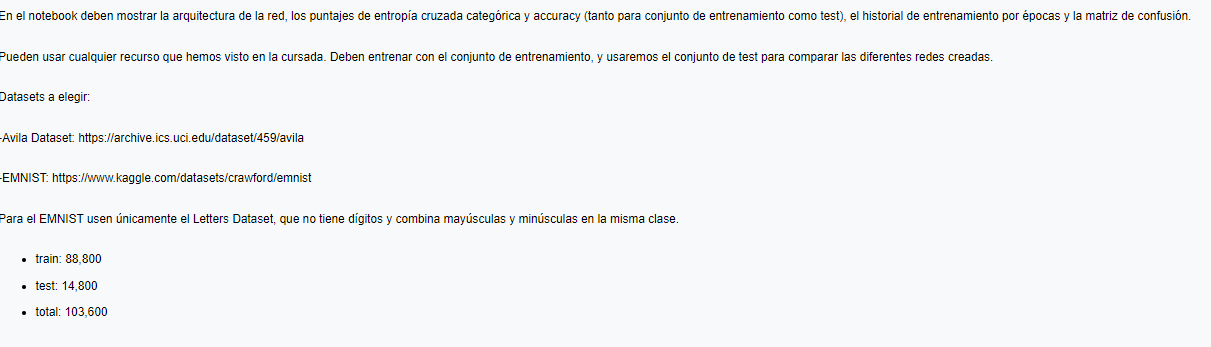



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
avilatrain = pd.read_csv('avila-tr.txt', sep=',',header=None)
avilatest = pd.read_csv('avila-ts.txt', sep=',',header=None)

display(avilatrain)
display(avilatest)


,0,1,2,3,4,5,6,7,8,9,10
0,0.266074,-0.165620,0.320980,0.483299,0.172340,0.273364,0.371178,0.929823,0.251173,0.159345,A
1,0.130292,0.870736,-3.210528,0.062493,0.261718,1.436060,1.465940,0.636203,0.282354,0.515587,A
2,-0.116585,0.069915,0.068476,-0.783147,0.261718,0.439463,-0.081827,-0.888236,-0.123005,0.582939,A
3,0.031541,0.297600,-3.210528,-0.583590,-0.721442,-0.307984,0.710932,1.051693,0.594169,-0.533994,A
4,0.229043,0.807926,-0.052442,0.082634,0.261718,0.148790,0.635431,0.051062,0.032902,-0.086652,F
...,...,...,...,...,...,...,...,...,...,...,...
10425,0.080916,0.588093,0.015130,0.002250,0.261718,-0.557133,0.371178,0.932346,0.282354,-0.580141,F
10426,0.253730,-0.338346,0.352988,-1.154243,0.172340,-0.557133,0.257927,0.348428,0.032902,-0.527134,F
10427,0.229043,-0.000745,0.171611,-0.002793,0.261718,0.688613,0.295677,-1.088486,-0.590727,0.580142,A
10428,-0.301743,0.352558,0.288973,1.638181,0.261718,0.688613,0.069175,0.502761,0.625350,0.718969,E


,0,1,2,3,4,5,6,7,8,9,10
0,-3.498799,0.250492,0.232070,1.224178,-4.922215,1.145386,0.182426,-0.165983,-0.123005,1.087144,W
1,0.204355,-0.354049,0.320980,0.410166,-0.989576,-2.218127,0.220177,0.181844,2.090879,-2.009758,A
2,0.759828,-1.304042,-0.023991,-0.973663,-0.006417,-0.349509,-0.421580,-0.450127,0.469443,0.060952,I
3,-0.005490,0.360409,0.281860,-0.213479,-1.168333,-1.013906,-0.346080,1.176165,0.968347,-0.627999,E
4,0.080916,0.101320,0.104040,0.140490,0.261718,0.480988,0.710932,-0.253430,-0.497183,0.155681,A
...,...,...,...,...,...,...,...,...,...,...,...
10432,-0.128929,-0.040001,0.057807,0.557894,0.261718,-0.930856,-0.044076,1.158458,2.277968,-0.699884,X
10433,0.266074,0.556689,-0.020434,0.176624,0.261718,-0.515608,0.597681,0.178349,0.625350,-0.657245,G
10434,-0.054866,0.580242,0.032912,-0.016668,0.261718,1.519109,0.371178,-0.985508,-0.403638,1.276301,A
10435,0.080916,0.588093,0.015130,0.002250,0.261718,-0.930856,-0.270579,0.163807,-0.091823,-0.593329,F


In [ ]:
import sklearn
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

trainX=avilatrain.iloc[:,0:10]
trainY=avilatrain.iloc[:,10]
testX=avilatest.iloc[:,0:10]
testY=avilatest.iloc[:,10]

display(trainX)
display(trainY)



,0,1,2,3,4,5,6,7,8,9
0,0.266074,-0.165620,0.320980,0.483299,0.172340,0.273364,0.371178,0.929823,0.251173,0.159345
1,0.130292,0.870736,-3.210528,0.062493,0.261718,1.436060,1.465940,0.636203,0.282354,0.515587
2,-0.116585,0.069915,0.068476,-0.783147,0.261718,0.439463,-0.081827,-0.888236,-0.123005,0.582939
3,0.031541,0.297600,-3.210528,-0.583590,-0.721442,-0.307984,0.710932,1.051693,0.594169,-0.533994
4,0.229043,0.807926,-0.052442,0.082634,0.261718,0.148790,0.635431,0.051062,0.032902,-0.086652
...,...,...,...,...,...,...,...,...,...,...
10425,0.080916,0.588093,0.015130,0.002250,0.261718,-0.557133,0.371178,0.932346,0.282354,-0.580141
10426,0.253730,-0.338346,0.352988,-1.154243,0.172340,-0.557133,0.257927,0.348428,0.032902,-0.527134
10427,0.229043,-0.000745,0.171611,-0.002793,0.261718,0.688613,0.295677,-1.088486,-0.590727,0.580142
10428,-0.301743,0.352558,0.288973,1.638181,0.261718,0.688613,0.069175,0.502761,0.625350,0.718969


,10
0,A
1,A
2,A
3,A
4,F
...,...
10425,F
10426,F
10427,A
10428,E


In [ ]:
OneHotEncoder = LabelBinarizer()
trainY = OneHotEncoder.fit_transform(trainY)
testY = OneHotEncoder.fit_transform(testY)

modelo = Sequential()
modelo.add(Dense(units=10, activation='relu', input_shape=(10,)))
modelo.add(Dense(units=10, activation='relu'))
modelo.add(Dense(units=12, activation='softmax'))

modelo.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

modelo.fit(trainX, trainY, epochs=30, batch_size=32, validation_data=(testX, testY))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
326/326 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.2456 - loss: 2.3123 - val_accuracy: 0.4475 - val_loss: 1.7262
Epoch 2/30
326/326 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.4762 - loss: 1.6237 - val_accuracy: 0.5163 - val_loss: 1.4470
Epoch 3/30
326/326 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5230 - loss: 1.4105 - val_accuracy: 0.5414 - val_loss: 1.3330
Epoch 4/30
326/326 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5604 - loss: 1.3075 - val_accuracy: 0.5626 - val_loss: 1.2680
Epoch 5/30
326/326 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5708 - loss: 1.2495 - val_accuracy: 0.5707 - val_loss: 1.2279
Epoch 6/30
326/326 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5811 - loss: 1.2083 - val_accuracy: 0.5849 - val_loss: 1.1963
Epoch 7/30
326/326 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5800 - loss: 1.1888 - val_accuracy: 0.5929 - val_loss: 1.1723
Epoch 8/30
326/326 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5878 - loss: 1.1473 - val_accuracy: 

In [ ]:
testY.shape

(10437, 12)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.optimizers import Adam

avilatrain = pd.read_csv('avila-tr.txt', sep=',', header=None)
avilatest = pd.read_csv('avila-ts.txt', sep=',', header=None)

trainX = avilatrain.iloc[:, 0:10]
trainY = avilatrain.iloc[:, 10]
testX = avilatest.iloc[:, 0:10]
testY = avilatest.iloc[:, 10]

encoder = LabelBinarizer()
trainY = encoder.fit_transform(trainY)
testY = encoder.transform(testY)

modelo = Sequential()

modelo.add(Dense(units=256, activation='relu', input_shape=(10,)))
modelo.add(Dropout(0.3))

modelo.add(Dense(units=128, activation='relu'))
modelo.add(Dropout(0.3))

modelo.add(Dense(units=64, activation='relu'))
modelo.add(Dropout(0.2))

modelo.add(Dense(units=12, activation='softmax'))

optimizer = Adam(learning_rate=0.001)
modelo.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)

history = modelo.fit(trainX, trainY, epochs=100, batch_size=32, validation_data=(testX, testY),
                     callbacks=[early_stopping, lr_scheduler], verbose=1)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Train vs Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Train vs Test Loss (Cross-Entropy)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


163/163 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.4168 - loss: 1.8978 - val_accuracy: 0.5794 - val_loss: 1.2061 - learning_rate: 0.0010
Epoch 2/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.5615 - loss: 1.2914 - val_accuracy: 0.6227 - val_loss: 1.0524 - learning_rate: 0.0010
Epoch 3/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5998 - loss: 1.1287 - val_accuracy: 0.6533 - val_loss: 0.9782 - learning_rate: 0.0010
Epoch 4/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6235 - loss: 1.0552 - val_accuracy: 0.6683 - val_loss: 0.9247 - learning_rate: 0.0010
Epoch 5/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6427 - loss: 0.9894 - val_accuracy: 0.6874 - val_loss: 0.8530 - learning_rate: 0.0010
Epoch 6/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6504 - loss: 0.9545 - val_accuracy: 0.6965 - val_loss: 0.8149 - learning_rate: 0.0010
Epoch 7/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6576 - loss: 0.9384 - val

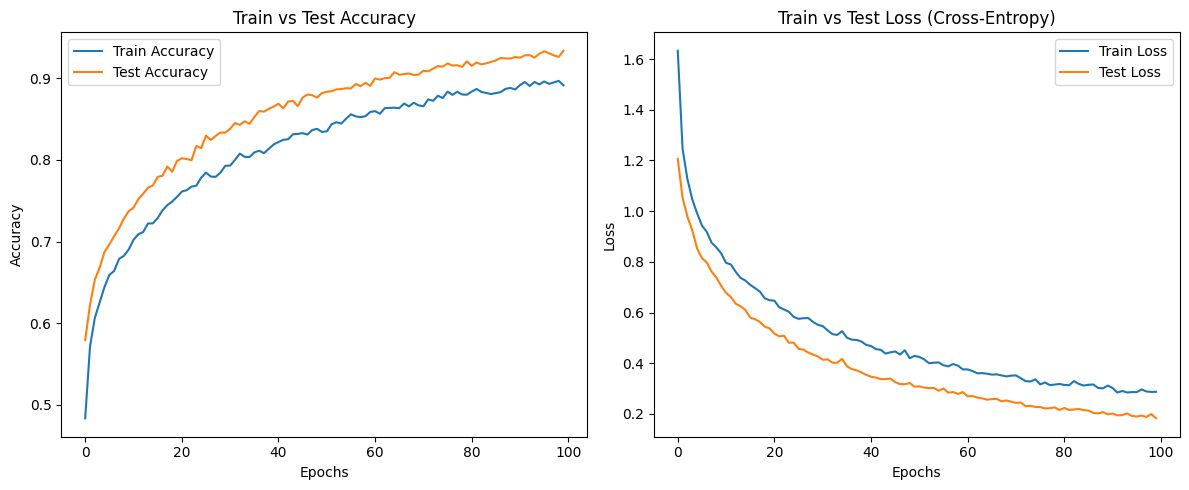

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Activation
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.optimizers import Adam

avilatrain = pd.read_csv('avila-tr.txt', sep=',', header=None)
avilatest = pd.read_csv('avila-ts.txt', sep=',', header=None)

trainX = avilatrain.iloc[:, 0:10]
trainY = avilatrain.iloc[:, 10]
testX = avilatest.iloc[:, 0:10]
testY = avilatest.iloc[:, 10]

encoder = LabelBinarizer()
trainY = encoder.fit_transform(trainY)
testY = encoder.transform(testY)

modelo = Sequential()

modelo.add(Dense(units=512, input_shape=(10,)))
modelo.add(Activation('relu'))
modelo.add(Dropout(0.4))

modelo.add(Dense(units=256))
modelo.add(Activation('relu'))
modelo.add(Dropout(0.4))

modelo.add(Dense(units=128))
modelo.add(Activation('relu'))
modelo.add(Dropout(0.3))

modelo.add(Dense(units=64))
modelo.add(Activation('relu'))
modelo.add(Dropout(0.3))

modelo.add(Dense(units=12, activation='softmax'))

optimizer = Adam(learning_rate=0.001)
modelo.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)

history = modelo.fit(trainX, trainY, epochs=100, batch_size=64, validation_data=(testX, testY),
                     callbacks=[early_stopping, lr_scheduler], verbose=1)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Train vs Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Train vs Test Loss (Cross-Entropy)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 31s 6ms/step - accuracy: 0.2877 - loss: 2.7536 - val_accuracy: 0.5229 - val_loss: 1.6338 - learning_rate: 0.0010
Epoch 2/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5217 - loss: 1.6867 - val_accuracy: 0.6063 - val_loss: 1.3856 - learning_rate: 0.0010
Epoch 3/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5701 - loss: 1.5106 - val_accuracy: 0.6079 - val_loss: 1.3384 - learning_rate: 0.0010
Epoch 4/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5928 - loss: 1.3957 - val_accuracy: 0.6162 - val_loss: 1.2841 - learning_rate: 0.0010
Epoch 5/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5922 - loss: 1.3558 - val_accuracy: 0.6313 - val_loss: 1.2110 - learning_rate: 0.0010
Epoch 6/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6126 - loss: 1.2856 - val_accuracy: 0.6435 - val_loss: 1.1888 - learning_rate: 0.0010
Epoch 7/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6150 - loss: 1

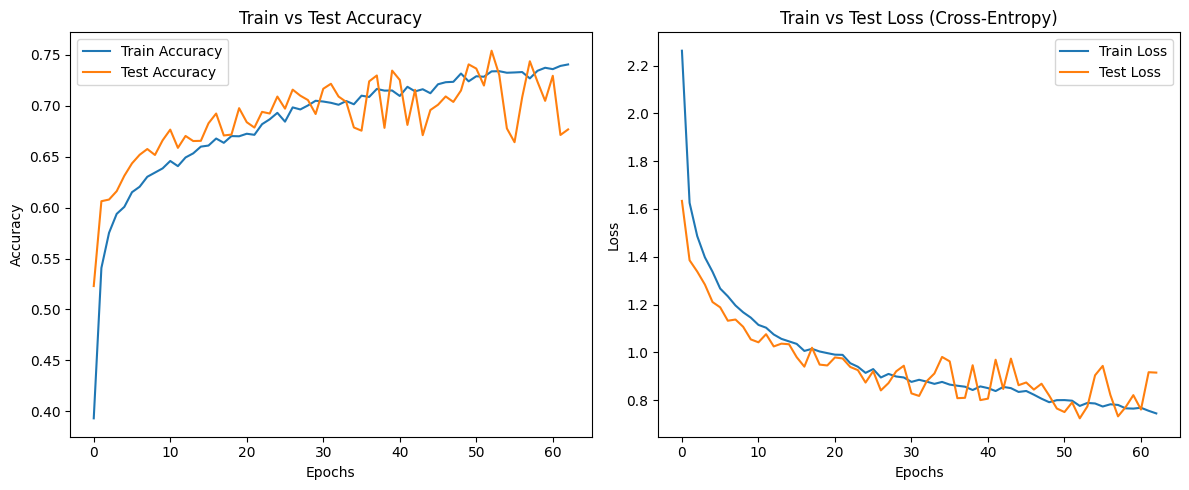

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.optimizers import Adam
from keras.regularizers import l2

# Cargar los datos
avilatrain = pd.read_csv('avila-tr.txt', sep=',', header=None)
avilatest = pd.read_csv('avila-ts.txt', sep=',', header=None)

# Separar características y etiquetas
trainX = avilatrain.iloc[:, 0:10]
trainY = avilatrain.iloc[:, 10]
testX = avilatest.iloc[:, 0:10]
testY = avilatest.iloc[:, 10]

# Binarizar las etiquetas
encoder = LabelBinarizer()
trainY = encoder.fit_transform(trainY)
testY = encoder.transform(testY)

# Definir el modelo
modelo = Sequential()

# Capa de entrada
modelo.add(Dense(units=256, activation='relu', input_shape=(10,), kernel_regularizer=l2(0.001)))  # Regularización L2
modelo.add(BatchNormalization())  # Normalización por lotes
modelo.add(Dropout(0.5))  # Aumentar la tasa de Dropout

# Capa oculta
modelo.add(Dense(units=128, activation='relu', kernel_regularizer=l2(0.001)))  # Regularización L2
modelo.add(BatchNormalization())  # Normalización por lotes
modelo.add(Dropout(0.5))  # Aumentar la tasa de Dropout

# Capa oculta adicional
modelo.add(Dense(units=64, activation='relu', kernel_regularizer=l2(0.001)))  # Regularización L2
modelo.add(BatchNormalization())  # Normalización por lotes
modelo.add(Dropout(0.4))  # Aumentar la tasa de Dropout

# Capa de salida
modelo.add(Dense(units=12, activation='softmax'))

# Compilar el modelo
optimizer = Adam(learning_rate=0.001)
modelo.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)

history = modelo.fit(trainX, trainY, epochs=100, batch_size=32, validation_data=(testX, testY),
                     callbacks=[early_stopping, lr_scheduler], verbose=1)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Train vs Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Train vs Test Loss (Cross-Entropy)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.3826 - loss: 2.5460 - val_accuracy: 0.5105 - val_loss: 2.0032 - learning_rate: 0.0010
Epoch 2/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.5470 - loss: 1.8853 - val_accuracy: 0.5727 - val_loss: 1.7348 - learning_rate: 0.0010
Epoch 3/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.5878 - loss: 1.6650 - val_accuracy: 0.6227 - val_loss: 1.5702 - learning_rate: 0.0010
Epoch 4/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.6093 - loss: 1.5664 - val_accuracy: 0.6317 - val_loss: 1.4581 - learning_rate: 0.0010
Epoch 5/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.6271 - loss: 1.4727 - val_accuracy: 0.6441 - val_loss: 1.3594 - learning_rate: 0.0010
Epoch 6/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.6370 - loss: 1.3793 - val_accuracy: 0.6226 - val_loss: 1.3773 - learning_rate: 0.0010
Epoch 7/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6464 - l

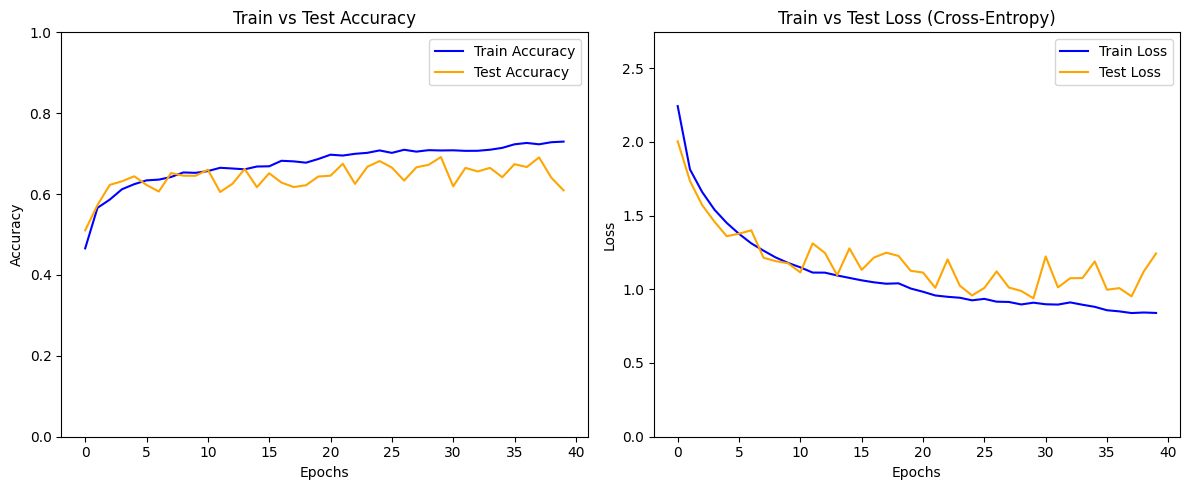

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Activation
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.optimizers import Adam
from keras.regularizers import l2

# Cargar los datos
avilatrain = pd.read_csv('avila-tr.txt', sep=',', header=None)
avilatest = pd.read_csv('avila-ts.txt', sep=',', header=None)

trainX = avilatrain.iloc[:, 0:10]
trainY = avilatrain.iloc[:, 10]
testX = avilatest.iloc[:, 0:10]
testY = avilatest.iloc[:, 10]

# Binarizar las etiquetas
encoder = LabelBinarizer()
trainY = encoder.fit_transform(trainY)
testY = encoder.transform(testY)

# Definir el modelo
modelo = Sequential()

# Primera capa
modelo.add(Dense(units=512, input_shape=(10,), kernel_regularizer=l2(0.001)))  # Regularización L2
modelo.add(BatchNormalization())  # Batch Normalization
modelo.add(Activation('relu'))
modelo.add(Dropout(0.4))

# Segunda capa
modelo.add(Dense(units=256, kernel_regularizer=l2(0.001)))  # Regularización L2
modelo.add(BatchNormalization())  # Batch Normalization
modelo.add(Activation('relu'))
modelo.add(Dropout(0.4))

# Tercera capa
modelo.add(Dense(units=128, kernel_regularizer=l2(0.001)))  # Regularización L2
modelo.add(BatchNormalization())  # Batch Normalization
modelo.add(Activation('relu'))
modelo.add(Dropout(0.3))

# Cuarta capa
modelo.add(Dense(units=64, kernel_regularizer=l2(0.001)))  # Regularización L2
modelo.add(BatchNormalization())  # Batch Normalization
modelo.add(Activation('relu'))
modelo.add(Dropout(0.3))

# Capa de salida
modelo.add(Dense(units=12, activation='softmax'))

# Compilación del modelo
optimizer = Adam(learning_rate=0.001)
modelo.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks para el entrenamiento
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)

# Entrenamiento del modelo
history = modelo.fit(trainX, trainY, epochs=100, batch_size=64, validation_data=(testX, testY),
                     callbacks=[early_stopping, lr_scheduler], verbose=1)

# Visualización de resultados
plt.figure(figsize=(12, 5))

# Gráfico de precisión
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Test Accuracy', color='orange')
plt.title('Train vs Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Ajustar el eje y para una mejor visualización
plt.legend()

# Gráfico de pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', color='blue')
plt.plot(history.history['val_loss'], label='Test Loss', color='orange')
plt.title('Train vs Test Loss (Cross-Entropy)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, max(max(history.history['loss']), max(history.history['val_loss'])) + 0.5)  # Ajustar el eje y
plt.legend()

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/60
163/163 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - categorical_accuracy: 0.1722 - loss: 3.1738 - val_categorical_accuracy: 0.4059 - val_loss: 2.7801
Epoch 2/60
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - categorical_accuracy: 0.3471 - loss: 2.7668 - val_categorical_accuracy: 0.4244 - val_loss: 2.4473
Epoch 3/60
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - categorical_accuracy: 0.3990 - loss: 2.5308 - val_categorical_accuracy: 0.4629 - val_loss: 2.2500
Epoch 4/60
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - categorical_accuracy: 0.4442 - loss: 2.3472 - val_categorical_accuracy: 0.5119 - val_loss: 2.0862
Epoch 5/60
163/163 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - categorical_accuracy: 0.4682 - loss: 2.2416 - val_categorical_accuracy: 0.5114 - val_loss: 2.0650
Epoch 6/60
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - categorical_accuracy: 0.4857 - loss: 2.1681 - val_categorical_accuracy: 0.5213 - val_loss: 2.0119
Epoch 7/60
163/163 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - categorical_accuracy: 0.504

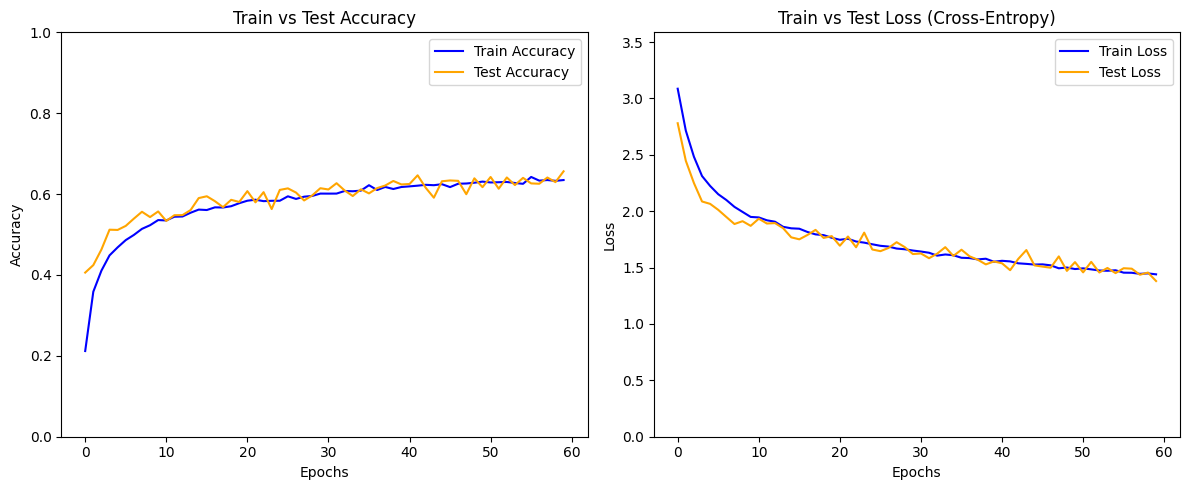

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Activation
from keras.optimizers import Adam
from keras.regularizers import l2

# Cargar los datos
avilatrain = pd.read_csv('avila-tr.txt', sep=',', header=None)
avilatest = pd.read_csv('avila-ts.txt', sep=',', header=None)

trainX = avilatrain.iloc[:, 0:10]
trainY = avilatrain.iloc[:, 10]
testX = avilatest.iloc[:, 0:10]
testY = avilatest.iloc[:, 10]

# Binarizar las etiquetas
encoder = LabelBinarizer()
trainY = encoder.fit_transform(trainY)
testY = encoder.transform(testY)

# Definir el modelo
modelo = Sequential()

# Parámetros
epochs = 60
learning_rate = 0.001

# Definir el optimizador
opt = Adam(learning_rate, beta_1=0.9, beta_2=0.999, epsilon=0.1)

# Definir el modelo
modelo.add(Dense(units=512, input_shape=(10,), kernel_regularizer=l2(0.001)))
modelo.add(BatchNormalization())
modelo.add(Activation('relu'))
modelo.add(Dropout(0.4))

modelo.add(Dense(units=256, kernel_regularizer=l2(0.001)))
modelo.add(BatchNormalization())
modelo.add(Activation('relu'))
modelo.add(Dropout(0.4))

modelo.add(Dense(units=128, kernel_regularizer=l2(0.001)))
modelo.add(BatchNormalization())
modelo.add(Activation('relu'))
modelo.add(Dropout(0.3))

modelo.add(Dense(units=64, kernel_regularizer=l2(0.001)))
modelo.add(BatchNormalization())
modelo.add(Activation('relu'))
modelo.add(Dropout(0.3))

modelo.add(Dense(units=12, activation='softmax'))

# Compilación del modelo
modelo.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['categorical_accuracy'])

# Entrenamiento del modelo
history = modelo.fit(trainX, trainY, epochs=epochs, batch_size=64, validation_data=(testX, testY), verbose=1)

# Visualización de resultados
plt.figure(figsize=(12, 5))

# Gráfico de precisión
plt.subplot(1, 2, 1)
plt.plot(history.history['categorical_accuracy'], label='Train Accuracy', color='blue')
plt.plot(history.history['val_categorical_accuracy'], label='Test Accuracy', color='orange')
plt.title('Train vs Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Ajustar el eje y para una mejor visualización
plt.legend()

# Gráfico de pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', color='blue')
plt.plot(history.history['val_loss'], label='Test Loss', color='orange')
plt.title('Train vs Test Loss (Cross-Entropy)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, max(max(history.history['loss']), max(history.history['val_loss'])) + 0.5)  # Ajustar el eje y
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer, StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Activation
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.optimizers import Adam
from keras.regularizers import l2

# Cargar datos
avilatrain = pd.read_csv('avila-tr.txt', sep=',', header=None)
avilatest = pd.read_csv('avila-ts.txt', sep=',', header=None)

# Definir características y etiquetas
trainX = avilatrain.iloc[:, 0:10]
trainY = avilatrain.iloc[:, 10]
testX = avilatest.iloc[:, 0:10]
testY = avilatest.iloc[:, 10]

# Binarizar etiquetas
encoder = LabelBinarizer()
trainY = encoder.fit_transform(trainY)
testY = encoder.transform(testY)

# Normalizar los datos
scaler = StandardScaler()
trainX = scaler.fit_transform(trainX)
testX = scaler.transform(testX)

# Definir el modelo
modelo = Sequential()

# Capa 1
modelo.add(Dense(units=512, input_shape=(10,), kernel_regularizer=l2(0.001)))
modelo.add(BatchNormalization())
modelo.add(Activation('relu'))
modelo.add(Dropout(0.5))

# Capa 2
modelo.add(Dense(units=256, kernel_regularizer=l2(0.001)))
modelo.add(BatchNormalization())
modelo.add(Activation('relu'))
modelo.add(Dropout(0.5))

# Capa 3
modelo.add(Dense(units=128, kernel_regularizer=l2(0.001)))
modelo.add(BatchNormalization())
modelo.add(Activation('relu'))
modelo.add(Dropout(0.4))

# Capa 4
modelo.add(Dense(units=64, kernel_regularizer=l2(0.001)))
modelo.add(BatchNormalization())
modelo.add(Activation('relu'))
modelo.add(Dropout(0.4))

# Capa de salida
modelo.add(Dense(units=12, activation='softmax'))

# Definir la tasa de aprendizaje
learning_rate = 0.001

# Definir el optimizador
opt = Adam(learning_rate, beta_1=0.9, beta_2=0.999, epsilon=0.1)

# Compilar el modelo
modelo.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['categorical_accuracy'])

# Definir el número de épocas
epochs = 60

# Entrenamiento del modelo
history = modelo.fit(trainX, trainY, epochs=epochs, batch_size=64, validation_data=(testX, testY), verbose=1)

# Graficar resultados
plt.figure(figsize=(12, 5))

# Gráfico de precisión
plt.subplot(1, 2, 1)
plt.plot(history.history['categorical_accuracy'], label='Train Accuracy')
plt.plot(history.history['val_categorical_accuracy'], label='Test Accuracy')
plt.title('Train vs Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Gráfico de pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Train vs Test Loss (Cross-Entropy)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/60
163/163 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - categorical_accuracy: 0.1371 - loss: 3.3519 - val_categorical_accuracy: 0.3284 - val_loss: 2.8141
Epoch 2/60
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - categorical_accuracy: 0.2686 - loss: 2.9505 - val_categorical_accuracy: 0.4135 - val_loss: 2.5237
Epoch 3/60
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - categorical_accuracy: 0.3567 - loss: 2.6910 - val_categorical_accuracy: 0.4505 - val_loss: 2.3227
Epoch 4/60
163/163 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - categorical_accuracy: 0.3931 - loss: 2.5501 - val_categorical_accuracy: 0.4954 - val_loss: 2.1784
Epoch 5/60
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - categorical_accuracy: 0.4212 - loss: 2.3967 - val_categorical_accuracy: 0.5080 - val_loss: 2.0956
Epoch 6/60
163/163 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - categorical_accuracy: 0.4294 - loss: 2.3137 - val_categorical_accuracy: 0.5196 - val_loss: 2.0255
Epoch 7/60
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - categorical_accuracy: 0.469

KeyboardInterrupt: 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


> 58.581
> 55.944
> 59.108
> 58.150
> 57.191


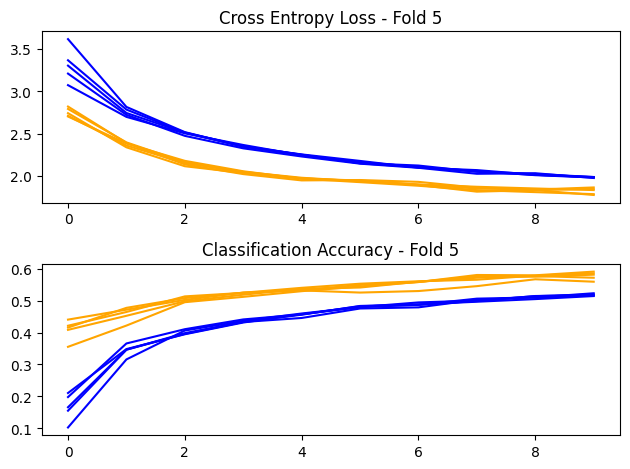

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer, StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Activation
from keras.optimizers import Adam
from keras.regularizers import l2
from sklearn.model_selection import KFold

# Cargar datos
avilatrain = pd.read_csv('avila-tr.txt', sep=',', header=None)
avilatest = pd.read_csv('avila-ts.txt', sep=',', header=None)

# Definir características y etiquetas
dataX = avilatrain.iloc[:, 0:10]
dataY = avilatrain.iloc[:, 10]

# Binarizar etiquetas
encoder = LabelBinarizer()
dataY = encoder.fit_transform(dataY)

# Normalizar los datos
scaler = StandardScaler()
dataX = scaler.fit_transform(dataX)

# Definir el modelo
def crear_modelo():
    modelo = Sequential()
    modelo.add(Dense(units=512, input_shape=(10,), kernel_regularizer=l2(0.001)))
    modelo.add(BatchNormalization())
    modelo.add(Activation('relu'))
    modelo.add(Dropout(0.5))

    modelo.add(Dense(units=256, kernel_regularizer=l2(0.001)))
    modelo.add(BatchNormalization())
    modelo.add(Activation('relu'))
    modelo.add(Dropout(0.5))

    modelo.add(Dense(units=128, kernel_regularizer=l2(0.001)))
    modelo.add(BatchNormalization())
    modelo.add(Activation('relu'))
    modelo.add(Dropout(0.4))

    modelo.add(Dense(units=64, kernel_regularizer=l2(0.001)))
    modelo.add(BatchNormalization())
    modelo.add(Activation('relu'))
    modelo.add(Dropout(0.4))

    modelo.add(Dense(units=12, activation='softmax'))

    learning_rate = 0.001
    opt = Adam(learning_rate, beta_1=0.9, beta_2=0.999, epsilon=0.1)
    modelo.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['categorical_accuracy'])

    return modelo

# Evaluación con un modelo simple
def evaluar_modelo_simple(dataX, dataY, modelo_func, epocas=10):
    scores, histories = list(), list()
    model = modelo_func()
    history = model.fit(dataX, dataY, epochs=epocas, batch_size=32, validation_split=0.2, verbose=1)
    _, acc = model.evaluate(dataX, dataY, verbose=1)
    print('> %.3f' % (acc * 100.0))
    scores.append(acc)
    histories.append(history)
    return scores, histories, model

# Evaluación con k-fold cross-validation
def evaluar_modelo_kfold(dataX, dataY, modelo_func, n_folds=5, estadoaleatorio=1):
    scores, histories = list(), list()
    kfold = KFold(n_folds, shuffle=True, random_state=estadoaleatorio)

    for train_ix, test_ix in kfold.split(dataX):
        # elegir filas para train y validation
        trainX, trainY = dataX[train_ix], dataY[train_ix]
        testX, testY = dataX[test_ix], dataY[test_ix]

        # definir model
        model = modelo_func()

        # fitear modelo
        history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)

        # evaluar modelo
        _, acc = model.evaluate(testX, testY, verbose=0)
        print('> %.3f' % (acc * 100.0))

        # guardar puntajes
        scores.append(acc)
        histories.append(history)
    return scores, histories

# Graficar diagnósticos
def diagnosticos(histories):
    for i in range(len(histories)):
        # graficar loss
        plt.subplot(2, 1, 1)
        plt.title('Cross Entropy Loss - Fold %d' % (i + 1))
        plt.plot(histories[i].history['loss'], color='blue', label='train')
        plt.plot(histories[i].history['val_loss'], color='orange', label='test')

        # graficar accuracy
        plt.subplot(2, 1, 2)
        plt.title('Classification Accuracy - Fold %d' % (i + 1))
        plt.plot(histories[i].history['categorical_accuracy'], color='blue', label='train')
        plt.plot(histories[i].history['val_categorical_accuracy'], color='orange', label='test')

    plt.tight_layout()
    plt.show()

# Ejemplo de uso
scores, histories = evaluar_modelo_kfold(dataX, dataY, crear_modelo, n_folds=5)
diagnosticos(histories)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
163/163 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.2524 - loss: 2.5204 - val_accuracy: 0.5310 - val_loss: 1.5921 - learning_rate: 5.0000e-04
Epoch 2/200
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5269 - loss: 1.4834 - val_accuracy: 0.5794 - val_loss: 1.2183 - learning_rate: 5.0000e-04
Epoch 3/200
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5846 - loss: 1.2708 - val_accuracy: 0.6084 - val_loss: 1.0983 - learning_rate: 5.0000e-04
Epoch 4/200
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6004 - loss: 1.1612 - val_accuracy: 0.6159 - val_loss: 1.0514 - learning_rate: 5.0000e-04
Epoch 5/200
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6181 - loss: 1.0840 - val_accuracy: 0.6354 - val_loss: 0.9912 - learning_rate: 5.0000e-04
Epoch 6/200
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6337 - loss: 1.0348 - val_accuracy: 0.6528 - val_loss: 0.9356 - learning_rate: 5.0000e-04
Epoch 7/200
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - ac

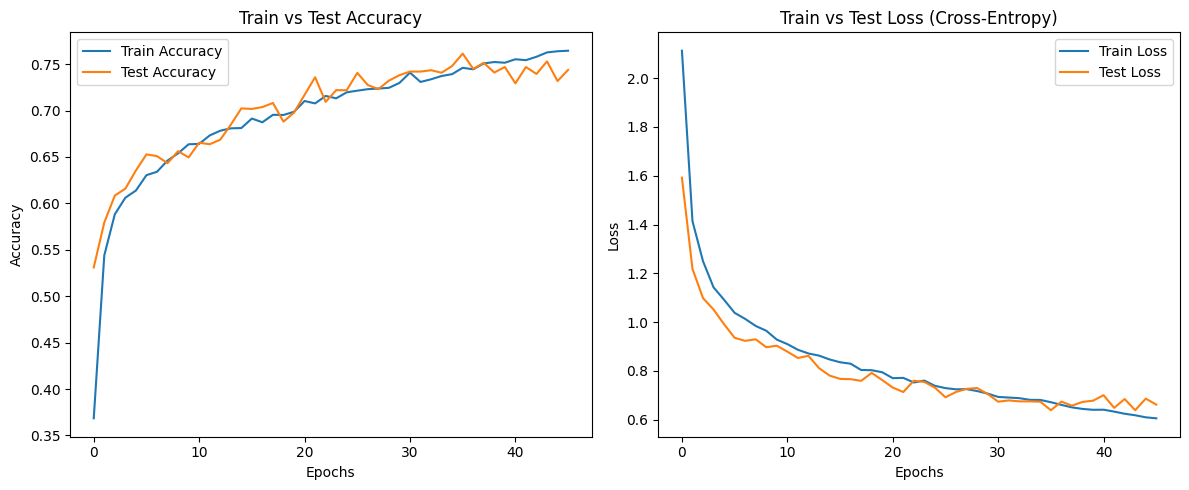

Test Accuracy: 0.7613


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Activation
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.optimizers import Adam

# Cargar los datos
avilatrain = pd.read_csv('avila-tr.txt', sep=',', header=None)
avilatest = pd.read_csv('avila-ts.txt', sep=',', header=None)

trainX = avilatrain.iloc[:, 0:10]
trainY = avilatrain.iloc[:, 10]
testX = avilatest.iloc[:, 0:10]
testY = avilatest.iloc[:, 10]

# Codificar las etiquetas en One-Hot
encoder = LabelBinarizer()
trainY = encoder.fit_transform(trainY)
testY = encoder.transform(testY)

# Definir el modelo simplificado
modelo = Sequential()

# Primera capa
modelo.add(Dense(units=256, input_shape=(10,)))
modelo.add(Activation('relu'))
modelo.add(BatchNormalization())
modelo.add(Dropout(0.3))  # Dropout ajustado

# Segunda capa
modelo.add(Dense(units=128))
modelo.add(Activation('relu'))
modelo.add(BatchNormalization())
modelo.add(Dropout(0.3))

# Tercera capa
modelo.add(Dense(units=64))
modelo.add(Activation('relu'))
modelo.add(BatchNormalization())
modelo.add(Dropout(0.2))

# Capa de salida
modelo.add(Dense(units=12, activation='softmax'))

# Optimización con Adam y ajuste de la tasa de aprendizaje
optimizer = Adam(learning_rate=0.0005)  # Tasa de aprendizaje más baja
modelo.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks: EarlyStopping y ReduceLROnPlateau ajustados para val_accuracy
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, min_lr=0.00001)

# Entrenar el modelo
history = modelo.fit(trainX, trainY, epochs=200, batch_size=64, validation_data=(testX, testY),
                     callbacks=[early_stopping, lr_scheduler], verbose=1)

# Graficar precisión y pérdida
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Train vs Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Train vs Test Loss (Cross-Entropy)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluar el modelo en el conjunto de test
test_loss, test_accuracy = modelo.evaluate(testX, testY, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/400
326/326 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.1074 - loss: 3.8713 - val_accuracy: 0.2893 - val_loss: 2.4845 - learning_rate: 1.0000e-04
Epoch 2/400
326/326 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.2026 - loss: 3.1985 - val_accuracy: 0.4733 - val_loss: 2.0753 - learning_rate: 1.0000e-04
Epoch 3/400
326/326 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.2787 - loss: 2.8340 - val_accuracy: 0.5152 - val_loss: 1.9017 - learning_rate: 1.0000e-04
Epoch 4/400
326/326 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3568 - loss: 2.5202 - val_accuracy: 0.5377 - val_loss: 1.7548 - learning_rate: 1.0000e-04
Epoch 5/400
326/326 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3910 - loss: 2.3564 - val_accuracy: 0.5443 - val_loss: 1.6976 - learning_rate: 1.0000e-04
Epoch 6/400
326/326 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4194 - loss: 2.2434 - val_accuracy: 0.5562 - val_loss: 1.6412 - learning_rate: 1.0000e-04
Epoch 7/400
326/326 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - acc

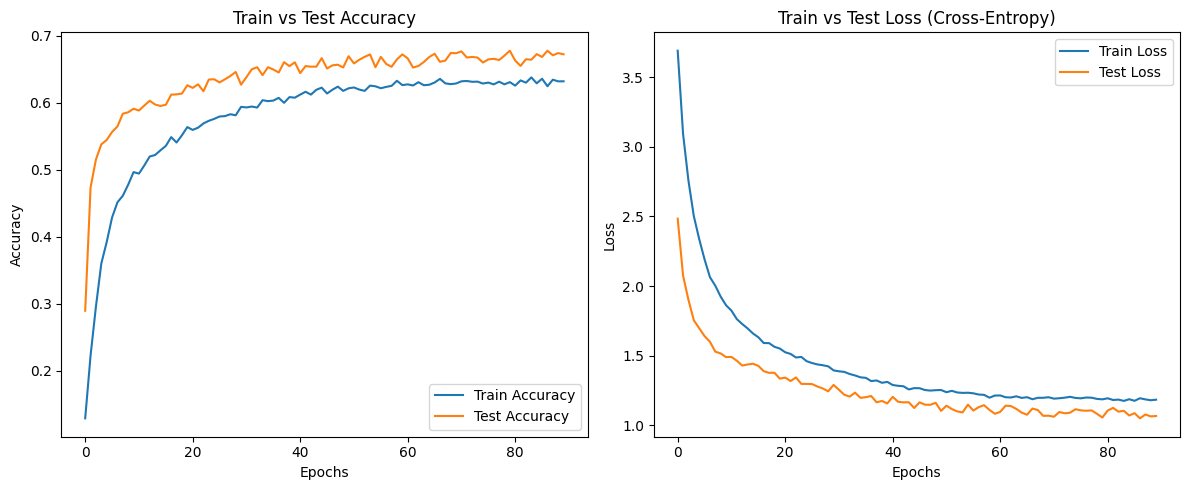

Test Accuracy: 0.6775


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Activation
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.optimizers import Adam
from keras.regularizers import l2

# Cargar los datos
avilatrain = pd.read_csv('avila-tr.txt', sep=',', header=None)
avilatest = pd.read_csv('avila-ts.txt', sep=',', header=None)

trainX = avilatrain.iloc[:, 0:10]
trainY = avilatrain.iloc[:, 10]
testX = avilatest.iloc[:, 0:10]
testY = avilatest.iloc[:, 10]

# Codificar las etiquetas en One-Hot
encoder = LabelBinarizer()
trainY = encoder.fit_transform(trainY)
testY = encoder.transform(testY)

# Definir el modelo con L2 Regularization
modelo = Sequential()

# Primera capa
modelo.add(Dense(units=256, input_shape=(10,), kernel_regularizer=l2(0.001)))
modelo.add(Activation('relu'))
modelo.add(BatchNormalization())
modelo.add(Dropout(0.5))  # Aumentado Dropout

# Segunda capa
modelo.add(Dense(units=128, kernel_regularizer=l2(0.001)))
modelo.add(Activation('relu'))
modelo.add(BatchNormalization())
modelo.add(Dropout(0.5))  # Aumentado Dropout

# Tercera capa
modelo.add(Dense(units=64, kernel_regularizer=l2(0.001)))
modelo.add(Activation('relu'))
modelo.add(BatchNormalization())
modelo.add(Dropout(0.5))  # Aumentado Dropout

# Capa de salida
modelo.add(Dense(units=12, activation='softmax'))

# Optimización con Adam y ajuste de la tasa de aprendizaje
optimizer = Adam(learning_rate=0.0001)  # Tasa de aprendizaje más baja
modelo.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks: EarlyStopping y ReduceLROnPlateau ajustados para val_accuracy
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, min_lr=0.00001)

# Entrenar el modelo
history = modelo.fit(trainX, trainY, epochs=400, batch_size=32, validation_data=(testX, testY),
                     callbacks=[early_stopping, lr_scheduler], verbose=1)

# Graficar precisión y pérdida
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Train vs Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Train vs Test Loss (Cross-Entropy)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluar el modelo en el conjunto de test
test_loss, test_accuracy = modelo.evaluate(testX, testY, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
163/163 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.1975 - loss: 8.0067 - val_accuracy: 0.2343 - val_loss: 7.2028 - learning_rate: 1.0000e-04
Epoch 2/200
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.4644 - loss: 6.8082 - val_accuracy: 0.5291 - val_loss: 6.4427 - learning_rate: 1.0000e-04
Epoch 3/200
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.5200 - loss: 6.3254 - val_accuracy: 0.5991 - val_loss: 5.8596 - learning_rate: 1.0000e-04
Epoch 4/200
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5614 - loss: 5.9189 - val_accuracy: 0.6234 - val_loss: 5.4643 - learning_rate: 1.0000e-04
Epoch 5/200
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.5732 - loss: 5.5967 - val_accuracy: 0.6303 - val_loss: 5.1736 - learning_rate: 1.0000e-04
Epoch 6/200
163/163 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.5918 - loss: 5.2610 - val_accuracy: 0.6396 - val_loss: 4.8774 - learning_rate: 1.0000e-04
Epoch 7/200
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/st

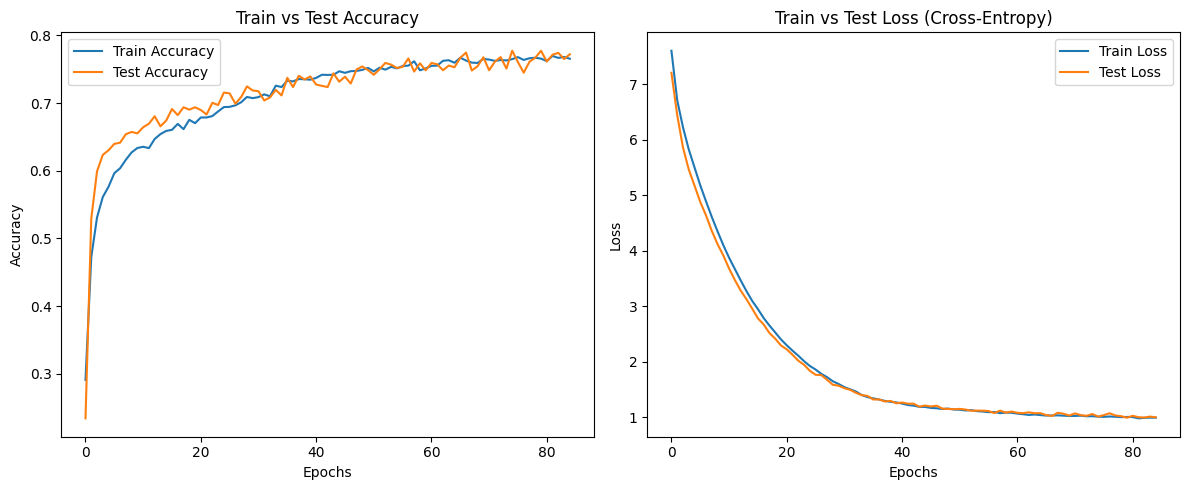

Test Accuracy: 0.7772


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Activation
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.optimizers import Adam
from keras.regularizers import l2

# Cargar los datos
avilatrain = pd.read_csv('avila-tr.txt', sep=',', header=None)
avilatest = pd.read_csv('avila-ts.txt', sep=',', header=None)

trainX = avilatrain.iloc[:, 0:10]
trainY = avilatrain.iloc[:, 10]
testX = avilatest.iloc[:, 0:10]
testY = avilatest.iloc[:, 10]

# Codificar las etiquetas en One-Hot
encoder = LabelBinarizer()
trainY = encoder.fit_transform(trainY)
testY = encoder.transform(testY)

# Definir el modelo mejorado
modelo = Sequential()

# Primera capa
modelo.add(Dense(units=512, input_shape=(10,), kernel_regularizer=l2(0.01)))  # Ajustar L2
modelo.add(Activation('relu'))
modelo.add(BatchNormalization())
modelo.add(Dropout(0.3))  # Reducido Dropout

# Segunda capa
modelo.add(Dense(units=256, kernel_regularizer=l2(0.01)))  # Ajustar L2
modelo.add(Activation('relu'))
modelo.add(BatchNormalization())
modelo.add(Dropout(0.3))  # Reducido Dropout

# Tercera capa
modelo.add(Dense(units=128, kernel_regularizer=l2(0.01)))  # Ajustar L2
modelo.add(Activation('relu'))
modelo.add(BatchNormalization())
modelo.add(Dropout(0.2))  # Reducido Dropout

# Capa de salida
modelo.add(Dense(units=12, activation='softmax'))

# Usar un optimizador diferente
optimizer = Adam(learning_rate=0.0001)  # Ajuste de la tasa de aprendizaje
modelo.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks: EarlyStopping y ReduceLROnPlateau
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, min_lr=0.00001)

# Entrenar el modelo
history = modelo.fit(trainX, trainY, epochs=200, batch_size=64, validation_data=(testX, testY),
                     callbacks=[early_stopping, lr_scheduler], verbose=1)

# Graficar precisión y pérdida
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Train vs Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Train vs Test Loss (Cross-Entropy)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluar el modelo en el conjunto de test
test_loss, test_accuracy = modelo.evaluate(testX, testY, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


163/163 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.4071 - loss: 1.9231 - val_accuracy: 0.5791 - val_loss: 1.2029 - learning_rate: 0.0010
Epoch 2/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5545 - loss: 1.2945 - val_accuracy: 0.6332 - val_loss: 1.0384 - learning_rate: 0.0010
Epoch 3/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.5996 - loss: 1.1547 - val_accuracy: 0.6504 - val_loss: 0.9539 - learning_rate: 0.0010
Epoch 4/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.6183 - loss: 1.0662 - val_accuracy: 0.6776 - val_loss: 0.8995 - learning_rate: 0.0010
Epoch 5/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6405 - loss: 0.9870 - val_accuracy: 0.6896 - val_loss: 0.8583 - learning_rate: 0.0010
Epoch 6/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6500 - loss: 0.9612 - val_accuracy: 0.7003 - val_loss: 0.8262 - learning_rate: 0.0010
Epoch 7/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6586 - loss: 0.9293 - v

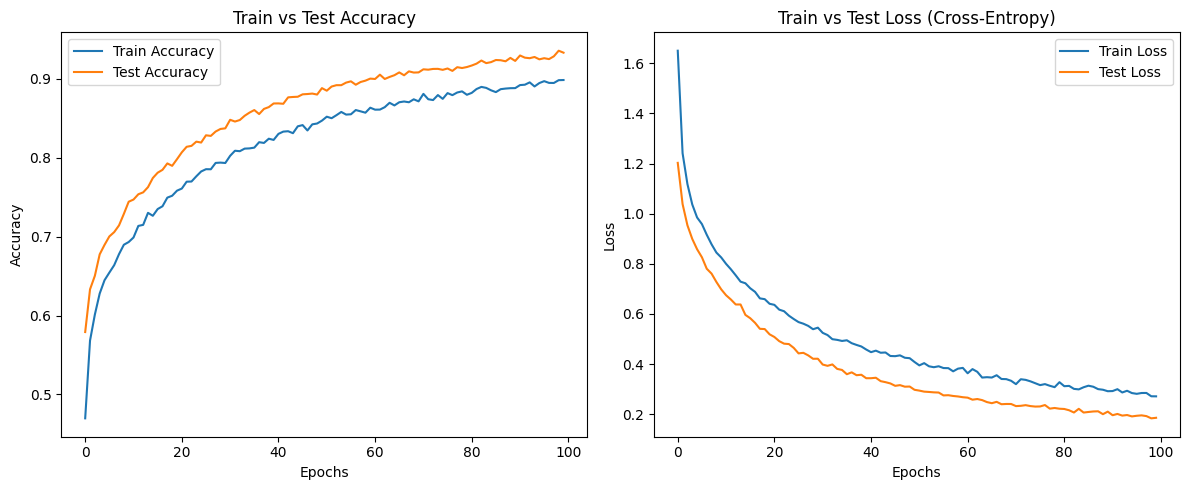

Test Accuracy: 0.9357
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


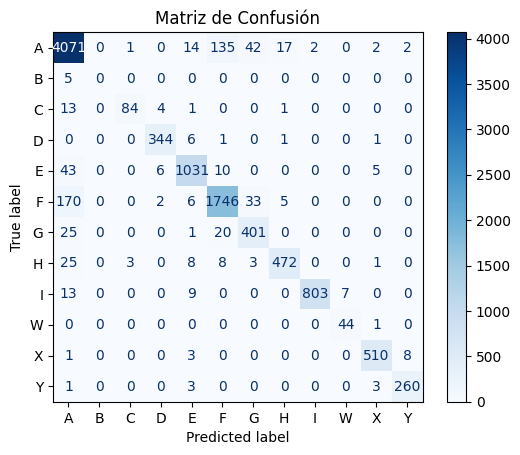

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Activation
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Cargar los datos
avilatrain = pd.read_csv('avila-tr.txt', sep=',', header=None)
avilatest = pd.read_csv('avila-ts.txt', sep=',', header=None)

trainX = avilatrain.iloc[:, 0:10]
trainY = avilatrain.iloc[:, 10]
testX = avilatest.iloc[:, 0:10]
testY = avilatest.iloc[:, 10]

# Codificar las etiquetas en One-Hot
encoder = LabelBinarizer()
trainY = encoder.fit_transform(trainY)
testY = encoder.transform(testY)

# Definir el modelo
modelo = Sequential()

modelo.add(Dense(units=512, input_shape=(10,)))
modelo.add(Activation('relu'))
modelo.add(Dropout(0.4))

modelo.add(Dense(units=256))
modelo.add(Activation('relu'))
modelo.add(Dropout(0.4))

modelo.add(Dense(units=128))
modelo.add(Activation('relu'))
modelo.add(Dropout(0.3))

modelo.add(Dense(units=64))
modelo.add(Activation('relu'))
modelo.add(Dropout(0.3))

modelo.add(Dense(units=12, activation='softmax'))

optimizer = Adam(learning_rate=0.001)
modelo.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)

# Entrenar el modelo
history = modelo.fit(trainX, trainY, epochs=100, batch_size=64, validation_data=(testX, testY),
                     callbacks=[early_stopping, lr_scheduler], verbose=1)

# Graficar precisión y pérdida
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Train vs Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Train vs Test Loss (Cross-Entropy)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluar el modelo en el conjunto de test
test_loss, test_accuracy = modelo.evaluate(testX, testY, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Predecir las clases en el conjunto de prueba
y_pred = modelo.predict(testX)
y_pred_classes = np.argmax(y_pred, axis=1)  # Clases predichas

# Convertir testY de One-Hot a clases
y_true = np.argmax(testY, axis=1)

# Crear la matriz de confusión
cm = confusion_matrix(y_true, y_pred_classes)

# Graficar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.show()



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.3965 - loss: 5.6660 - val_accuracy: 0.5252 - val_loss: 2.0671 - learning_rate: 0.0010
Epoch 2/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.5089 - loss: 2.0015 - val_accuracy: 0.5302 - val_loss: 1.6321 - learning_rate: 0.0010
Epoch 3/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.5297 - loss: 1.6627 - val_accuracy: 0.5453 - val_loss: 1.5447 - learning_rate: 0.0010
Epoch 4/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.5504 - loss: 1.5668 - val_accuracy: 0.5727 - val_loss: 1.4941 - learning_rate: 0.0010
Epoch 5/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.5538 - loss: 1.5618 - val_accuracy: 0.5752 - val_loss: 1.4425 - learning_rate: 0.0010
Epoch 6/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.5611 - loss: 1.5243 - val_accuracy: 0.5821 - val_loss: 1.4277 - learning_rate: 0.0010
Epoch 7/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.5706 - l

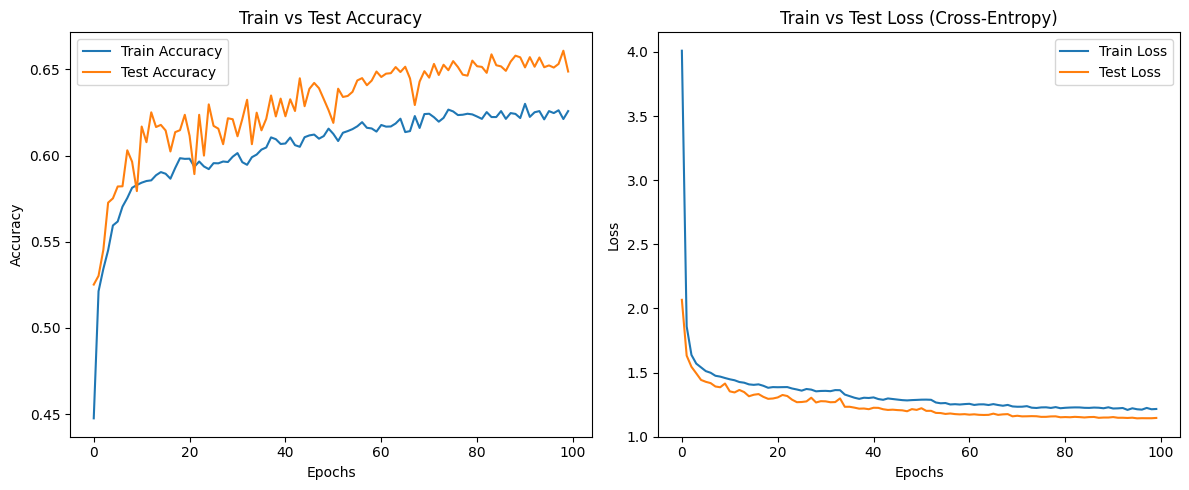

Test Accuracy: 0.6523
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


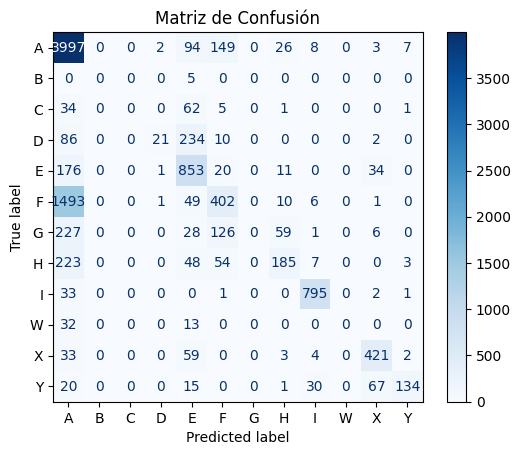

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Activation
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

# Cargar los datos
avilatrain = pd.read_csv('avila-tr.txt', sep=',', header=None)
avilatest = pd.read_csv('avila-ts.txt', sep=',', header=None)

# Dividir en características y etiquetas
trainX = avilatrain.iloc[:, 0:10]
trainY = avilatrain.iloc[:, 10]
testX = avilatest.iloc[:, 0:10]
testY = avilatest.iloc[:, 10]

# Normalizar los datos
scaler = StandardScaler()
trainX = scaler.fit_transform(trainX)
testX = scaler.transform(testX)

# Codificar las etiquetas en One-Hot
encoder = LabelBinarizer()
trainY = encoder.fit_transform(trainY)
testY = encoder.transform(testY)

# Definir el modelo
modelo = Sequential()
modelo.add(Dense(units=512, input_shape=(10,), kernel_regularizer='l2'))
modelo.add(Activation('relu'))
modelo.add(Dropout(0.5))

modelo.add(Dense(units=256, kernel_regularizer='l2'))
modelo.add(Activation('relu'))
modelo.add(Dropout(0.5))

modelo.add(Dense(units=128, kernel_regularizer='l2'))
modelo.add(Activation('relu'))
modelo.add(Dropout(0.4))

modelo.add(Dense(units=64, kernel_regularizer='l2'))
modelo.add(Activation('relu'))
modelo.add(Dropout(0.4))

modelo.add(Dense(units=12, activation='softmax'))

# Compilación del modelo
optimizer = Adam(learning_rate=0.001)
modelo.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)

# Entrenar el modelo
history = modelo.fit(trainX, trainY, epochs=100, batch_size=64, validation_data=(testX, testY),
                     callbacks=[early_stopping, lr_scheduler], verbose=1)

# Graficar precisión y pérdida
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Train vs Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Train vs Test Loss (Cross-Entropy)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluar el modelo en el conjunto de test
test_loss, test_accuracy = modelo.evaluate(testX, testY, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Predecir las clases en el conjunto de prueba
y_pred = modelo.predict(testX)
y_pred_classes = np.argmax(y_pred, axis=1)  # Clases predichas

# Convertir testY de One-Hot a clases
y_true = np.argmax(testY, axis=1)

# Crear la matriz de confusión
cm = confusion_matrix(y_true, y_pred_classes)

# Graficar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 21s 42ms/step - accuracy: 0.3570 - loss: 7.2657 - val_accuracy: 0.4309 - val_loss: 4.4087 - learning_rate: 0.0010
Epoch 2/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.5790 - loss: 3.4239 - val_accuracy: 0.4503 - val_loss: 2.7856 - learning_rate: 0.0010
Epoch 3/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.6084 - loss: 2.0921 - val_accuracy: 0.5212 - val_loss: 1.9579 - learning_rate: 0.0010
Epoch 4/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.6228 - loss: 1.5997 - val_accuracy: 0.6098 - val_loss: 1.5036 - learning_rate: 0.0010
Epoch 5/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.6078 - loss: 1.4413 - val_accuracy: 0.6169 - val_loss: 1.3529 - learning_rate: 0.0010
Epoch 6/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.6268 - loss: 1.3343 - val_accuracy: 0.6437 - val_loss: 1.2624 - learning_rate: 0.0010
Epoch 7/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.6254 - 

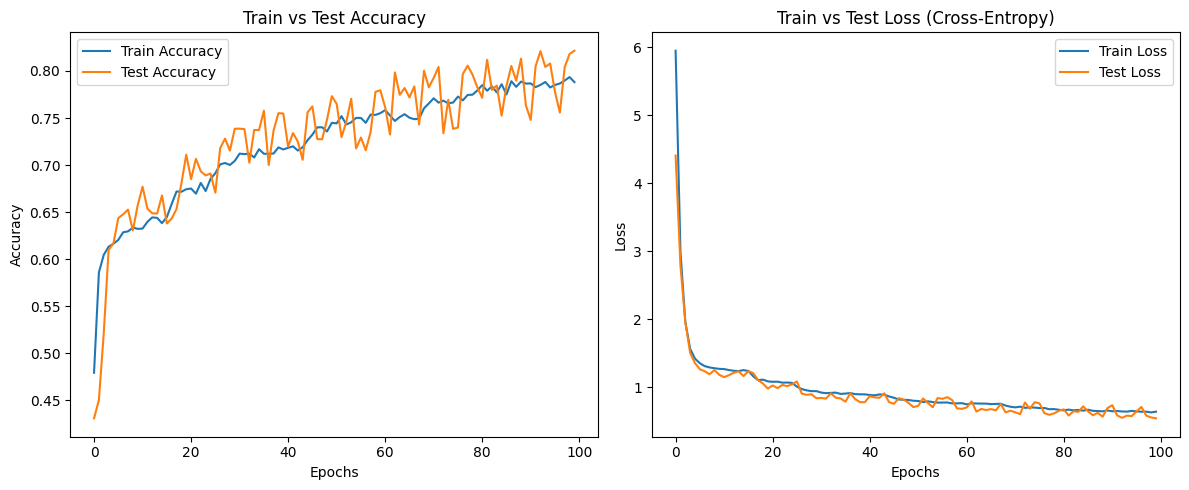

Test Accuracy: 0.8215
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


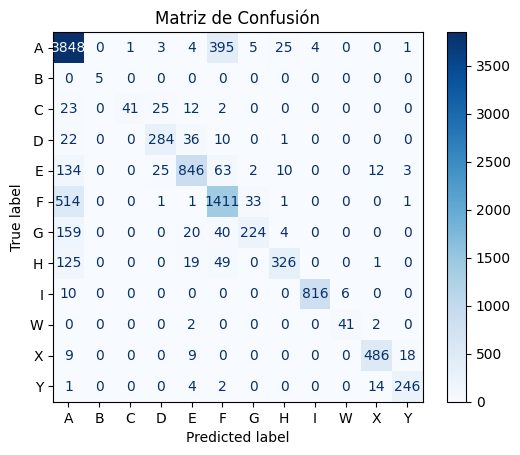

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Activation
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

# Cargar los datos
avilatrain = pd.read_csv('avila-tr.txt', sep=',', header=None)
avilatest = pd.read_csv('avila-ts.txt', sep=',', header=None)

# Dividir en características y etiquetas
trainX = avilatrain.iloc[:, 0:10]
trainY = avilatrain.iloc[:, 10]
testX = avilatest.iloc[:, 0:10]
testY = avilatest.iloc[:, 10]

# Normalizar los datos
scaler = StandardScaler()
trainX = scaler.fit_transform(trainX)
testX = scaler.transform(testX)

# Codificar las etiquetas en One-Hot
encoder = LabelBinarizer()
trainY = encoder.fit_transform(trainY)
testY = encoder.transform(testY)

# Definir el modelo
modelo = Sequential()

# Capa 1
modelo.add(Dense(units=512, input_shape=(10,), kernel_regularizer='l2'))
modelo.add(BatchNormalization())
modelo.add(Activation('relu'))
modelo.add(Dropout(0.3))  # Reducido para permitir más aprendizaje

# Capa 2
modelo.add(Dense(units=256, kernel_regularizer='l2'))
modelo.add(BatchNormalization())
modelo.add(Activation('relu'))
modelo.add(Dropout(0.3))  # Reducido para permitir más aprendizaje

# Capa 3
modelo.add(Dense(units=128, kernel_regularizer='l2'))
modelo.add(BatchNormalization())
modelo.add(Activation('relu'))
modelo.add(Dropout(0.3))

# Capa 4
modelo.add(Dense(units=64, kernel_regularizer='l2'))
modelo.add(BatchNormalization())
modelo.add(Activation('relu'))
modelo.add(Dropout(0.3))

# Capa de salida
modelo.add(Dense(units=12, activation='softmax'))

# Compilación del modelo
optimizer = Adam(learning_rate=0.001)
modelo.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)

# Entrenar el modelo
history = modelo.fit(trainX, trainY, epochs=100, batch_size=64, validation_data=(testX, testY),
                     callbacks=[early_stopping, lr_scheduler], verbose=1)

# Graficar precisión y pérdida
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Train vs Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Train vs Test Loss (Cross-Entropy)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluar el modelo en el conjunto de test
test_loss, test_accuracy = modelo.evaluate(testX, testY, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Predecir las clases en el conjunto de prueba
y_pred = modelo.predict(testX)
y_pred_classes = np.argmax(y_pred, axis=1)  # Clases predichas

# Convertir testY de One-Hot a clases
y_true = np.argmax(testY, axis=1)

# Crear la matriz de confusión
cm = confusion_matrix(y_true, y_pred_classes)

# Graficar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
326/326 ━━━━━━━━━━━━━━━━━━━━ 27s 47ms/step - accuracy: 0.1339 - loss: 14.8865 - val_accuracy: 0.4292 - val_loss: 13.1689 - learning_rate: 1.0000e-04
Epoch 2/200
326/326 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 0.3118 - loss: 13.2164 - val_accuracy: 0.5380 - val_loss: 11.7461 - learning_rate: 1.0000e-04
Epoch 3/200
326/326 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - accuracy: 0.4212 - loss: 11.9255 - val_accuracy: 0.5606 - val_loss: 10.7232 - learning_rate: 1.0000e-04
Epoch 4/200
326/326 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - accuracy: 0.4602 - loss: 10.8596 - val_accuracy: 0.5793 - val_loss: 9.7983 - learning_rate: 1.0000e-04
Epoch 5/200
326/326 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.4892 - loss: 9.8638 - val_accuracy: 0.5919 - val_loss: 8.9276 - learning_rate: 1.0000e-04
Epoch 6/200
326/326 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - accuracy: 0.5044 - loss: 8.9799 - val_accuracy: 0.5909 - val_loss: 8.1206 - learning_rate: 1.0000e-04
Epoch 7/200
326/326 ━━━━━━━━━━━━━━━━━━━━

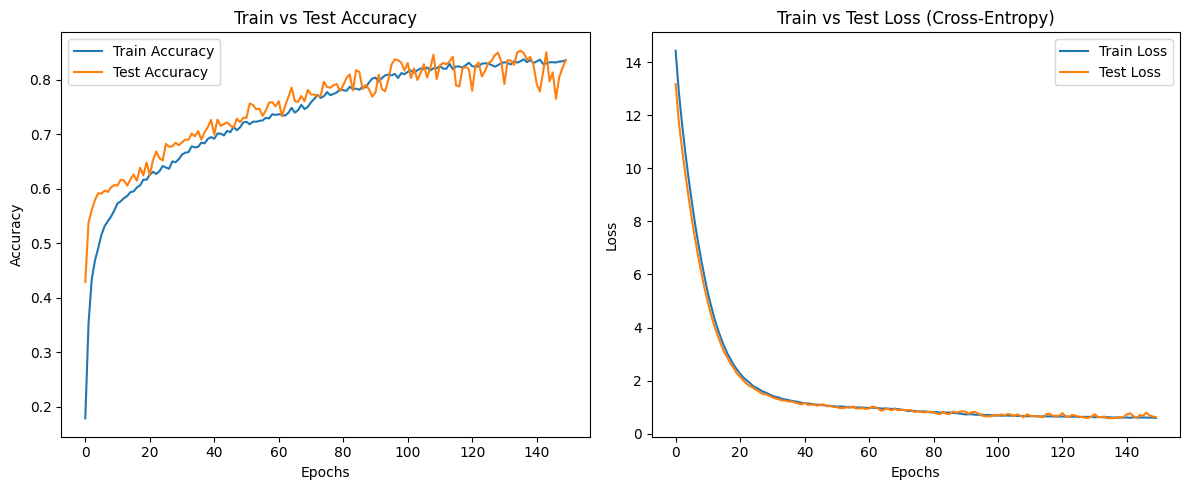

Test Accuracy: 0.8501
327/327 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


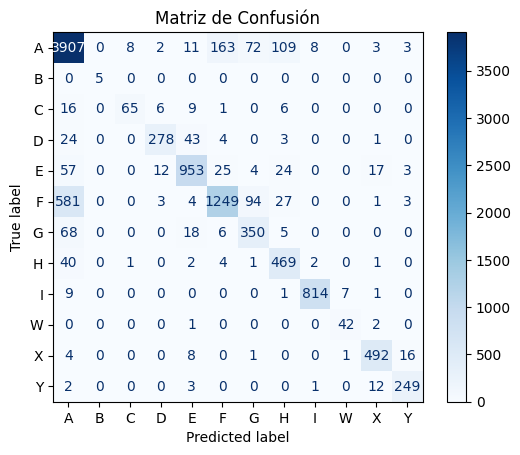

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Activation
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

# Cargar los datos
avilatrain = pd.read_csv('avila-tr.txt', sep=',', header=None)
avilatest = pd.read_csv('avila-ts.txt', sep=',', header=None)

# Dividir en características y etiquetas
trainX = avilatrain.iloc[:, 0:10]
trainY = avilatrain.iloc[:, 10]
testX = avilatest.iloc[:, 0:10]
testY = avilatest.iloc[:, 10]

# Normalizar los datos
scaler = StandardScaler()
trainX = scaler.fit_transform(trainX)
testX = scaler.transform(testX)

# Codificar las etiquetas en One-Hot
encoder = LabelBinarizer()
trainY = encoder.fit_transform(trainY)
testY = encoder.transform(testY)

# Definir el modelo
modelo = Sequential()
modelo.add(Dense(units=1024, input_shape=(10,), kernel_regularizer='l2'))
modelo.add(Activation('relu'))
modelo.add(Dropout(0.5))
modelo.add(BatchNormalization())

modelo.add(Dense(units=512, kernel_regularizer='l2'))
modelo.add(Activation('relu'))
modelo.add(Dropout(0.5))
modelo.add(BatchNormalization())

modelo.add(Dense(units=256, kernel_regularizer='l2'))
modelo.add(Activation('relu'))
modelo.add(Dropout(0.4))
modelo.add(BatchNormalization())

modelo.add(Dense(units=128, kernel_regularizer='l2'))
modelo.add(Activation('relu'))
modelo.add(Dropout(0.4))
modelo.add(BatchNormalization())

modelo.add(Dense(units=12, activation='softmax'))

# Compilación del modelo
optimizer = Adam(learning_rate=0.0001)  # Ajustar la tasa de aprendizaje
modelo.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)

# Entrenar el modelo
history = modelo.fit(trainX, trainY, epochs=200, batch_size=32, validation_data=(testX, testY),
                     callbacks=[early_stopping, lr_scheduler], verbose=1)

# Graficar precisión y pérdida
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Train vs Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Train vs Test Loss (Cross-Entropy)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluar el modelo en el conjunto de test
test_loss, test_accuracy = modelo.evaluate(testX, testY, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Predecir las clases en el conjunto de prueba
y_pred = modelo.predict(testX)
y_pred_classes = np.argmax(y_pred, axis=1)  # Clases predichas

# Convertir testY de One-Hot a clases
y_true = np.argmax(testY, axis=1)

# Crear la matriz de confusión
cm = confusion_matrix(y_true, y_pred_classes)

# Graficar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.show()


Al ver que no habia mejoras, aplico tecnicas de preprocesamiento de datos (SMOTE) para balancear clases
Se combinan los conjuntos de datos de entrenamiento y prueba para facilitar el equilibrio de clases
Se aplica SMOTE (Synthetic Minority Over-sampling Technique) para balancear las clases en el dataset. Esto genera nuevas muestras para la clase minoritaria y ayuda a mejorar la capacidad del modelo para generalizar.
Se divide el conjunto de datos balanceado en conjuntos de entrenamiento y prueba, asegurando que se mantenga la misma proporción de clases.
Las etiquetas se codifican en números y se convierten a formato categórico (One-Hot Encoding). Además, se estandarizan las características para que tengan media 0 y desviación estándar 1, mejorando el rendimiento del modelo.
Se define una red neuronal secuencial con varias capas densas. Se utiliza la regularización L2 para evitar el sobreajuste, y se aplican técnicas de normalización por lotes y abandono (Dropout) para mejorar la generalización del modelo.
El modelo se compila utilizando el optimizador Adam y la función de pérdida de entropía cruzada categórica, que es adecuada para clasificación multiclase.
Se definen callbacks para detener el entrenamiento temprano si la pérdida de validación no mejora después de varias épocas y para reducir la tasa de aprendizaje cuando la pérdida de validación se estanca.
El modelo se entrena durante un máximo de 100 épocas, utilizando un tamaño de lote de 64. Se monitorea el rendimiento en el conjunto de validación y se aplican los callbacks definidos.
Se grafican la precisión y la pérdida del entrenamiento y la validación para evaluar el rendimiento del modelo a lo largo de las épocas.

Dispositivos disponibles:  []
Class
A    4286
F    1962
E    1095
I     832
X     522
H     520
G     447
D     353
Y     267
C     103
W      45
B       5
Name: count, dtype: int64
Distribución original de las clases combinadas: Counter({'A': 8572, 'F': 3923, 'E': 2190, 'I': 1663, 'X': 1044, 'H': 1039, 'G': 893, 'D': 705, 'Y': 533, 'C': 206, 'W': 89, 'B': 10})
Distribución de las clases después de SMOTE: Counter({'A': 8572, 'F': 8572, 'H': 8572, 'E': 8572, 'I': 8572, 'Y': 8572, 'D': 8572, 'X': 8572, 'G': 8572, 'W': 8572, 'C': 8572, 'B': 8572})


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
1608/1608 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.6687 - loss: 1.0696 - val_accuracy: 0.8123 - val_loss: 0.6383 - learning_rate: 0.0010
Epoch 2/100
1608/1608 ━━━━━━━━━━━━━━━━━━━━ 35s 10ms/step - accuracy: 0.8140 - loss: 0.5802 - val_accuracy: 0.8803 - val_loss: 0.4554 - learning_rate: 0.0010
Epoch 3/100
1608/1608 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.8482 - loss: 0.4904 - val_accuracy: 0.8888 - val_loss: 0.4264 - learning_rate: 0.0010
Epoch 4/100
1608/1608 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.8652 - loss: 0.4483 - val_accuracy: 0.9079 - val_loss: 0.4035 - learning_rate: 0.0010
Epoch 5/100
1608/1608 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.8770 - loss: 0.4190 - val_accuracy: 0.9157 - val_loss: 0.3627 - learning_rate: 0.0010
Epoch 6/100
1608/1608 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.8830 - loss: 0.4099 - val_accuracy: 0.9125 - val_loss: 0.3909 - learning_rate: 0.0010
Epoch 7/100
1608/1608 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step -

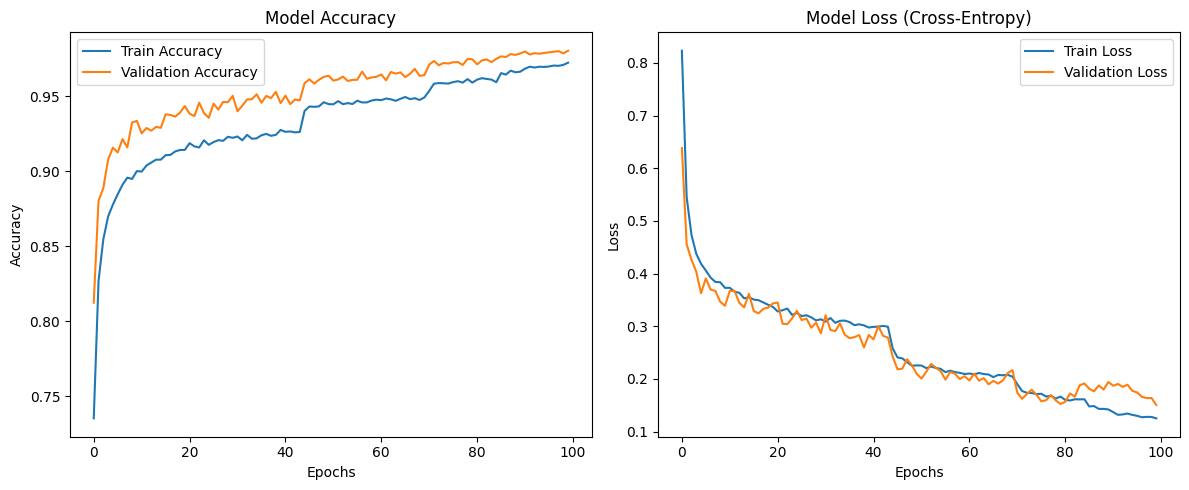

Test Accuracy: 0.9804
1608/1608 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
Precisión del modelo: 0.9804


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.regularizers import l2
from keras.callbacks import EarlyStopping, ReduceLROnPlateau


from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.metrics import accuracy_score

import urllib.request
import zipfile


import tensorflow as tf

# Verificar si TensorFlow está usando la GPU
print("Dispositivos disponibles: ", tf.config.list_physical_devices('GPU'))



url = 'https://archive.ics.uci.edu/static/public/459/avila.zip'
zip_filename = 'avila.zip'
urllib.request.urlretrieve(url, zip_filename)

with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall()

train_dataset_filename = 'avila/avila-tr.txt'
columns = ['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'Class']
avila_train_data = pd.read_csv(train_dataset_filename, names=columns)

test_dataset_filename = 'avila/avila-ts.txt'
avila_test_data = pd.read_csv(test_dataset_filename, names=columns)

trainX = avila_train_data.iloc[:, :-1]
trainY = avila_train_data.iloc[:, -1]
testX = avila_test_data.iloc[:, :-1]
testY = avila_test_data.iloc[:, -1]

print(testY.value_counts())

combined_data = pd.concat([avila_train_data, avila_test_data])

# Separar características y etiquetas
X = combined_data.iloc[:, :-1]
y = combined_data.iloc[:, -1]

# Mostrar distribución original de las clases
print("Distribución original de las clases combinadas:", Counter(y))

# Aplicar SMOTE para balancear el dataset
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

# Verificar la nueva distribución de las clases después de SMOTE
print("Distribución de las clases después de SMOTE:", Counter(y_smote))
trainX, testX, trainY, testY = train_test_split(X_smote, y_smote, test_size=0.5, stratify=y_smote, random_state=42)

# Codificar las etiquetas y One-Hot Encoding
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(trainY)
y_train_categorical = to_categorical(y_train_encoded)

y_test_encoded = label_encoder.transform(testY)
y_test_categorical = to_categorical(y_test_encoded)

scaler = StandardScaler()
X_train = scaler.fit_transform(trainX)
X_test = scaler.transform(testX)


model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.0001)),
    BatchNormalization(),
    Dropout(0.2),

    Dense(512, activation='relu', kernel_regularizer=l2(0.0001)),
    BatchNormalization(),
    Dropout(0.2),


    Dense(y_train_categorical.shape[1], activation='softmax')
])

# Compilar el modelo
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)

history = model.fit(X_train, y_train_categorical, epochs=100, batch_size=32,
                    validation_data=(X_test, y_test_categorical), callbacks=[reduce_lr] ,verbose=1)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.plot(history.history['accuracy'], label='Train Accuracy')
ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_title('Model Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend()

ax2.plot(history.history['loss'], label='Train Loss')
ax2.plot(history.history['val_loss'], label='Validation Loss')
ax2.set_title('Model Loss (Cross-Entropy)')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()

plt.tight_layout()
plt.show()

test_loss, test_accuracy = model.evaluate(X_test, y_test_categorical, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Guardar el modelo completo (
model.save('avila.h5')

testX = avila_test_data.iloc[:, :-1]

predicciones = model.predict(X_test)

predicciones_clases = np.argmax(predicciones, axis=1)

testY_encoded = label_encoder.transform(testY)

precision = accuracy_score(testY_encoded, predicciones_clases)

# Muestro que tan preciso es el modelo con los datos originales de prueba
print(f"Precisión del modelo: {precision:.4f}")


Dispositivos disponibles:  []
Distribución original de las clases combinadas: Counter({'A': 8572, 'F': 3923, 'E': 2190, 'I': 1663, 'X': 1044, 'H': 1039, 'G': 893, 'D': 705, 'Y': 533, 'C': 206, 'W': 89, 'B': 10})
Distribución de las clases después de SMOTE: Counter({'A': 8572, 'F': 8572, 'H': 8572, 'E': 8572, 'I': 8572, 'Y': 8572, 'D': 8572, 'X': 8572, 'G': 8572, 'W': 8572, 'C': 8572, 'B': 8572})
Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


804/804 ━━━━━━━━━━━━━━━━━━━━ 25s 26ms/step - accuracy: 0.6064 - loss: 1.2954 - val_accuracy: 0.8489 - val_loss: 0.5476 - learning_rate: 0.0010
Epoch 2/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 38s 22ms/step - accuracy: 0.8016 - loss: 0.6583 - val_accuracy: 0.8764 - val_loss: 0.4696 - learning_rate: 0.0010
Epoch 3/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 19s 23ms/step - accuracy: 0.8435 - loss: 0.5467 - val_accuracy: 0.9082 - val_loss: 0.3854 - learning_rate: 0.0010
Epoch 4/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 16s 20ms/step - accuracy: 0.8628 - loss: 0.4919 - val_accuracy: 0.9105 - val_loss: 0.3737 - learning_rate: 0.0010
Epoch 5/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 24s 25ms/step - accuracy: 0.8765 - loss: 0.4623 - val_accuracy: 0.9230 - val_loss: 0.3482 - learning_rate: 0.0010
Epoch 6/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 16s 20ms/step - accuracy: 0.8872 - loss: 0.4301 - val_accuracy: 0.9327 - val_loss: 0.3286 - learning_rate: 0.0010
Epoch 7/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 16s 20ms/step - accuracy: 0.8961 - loss: 

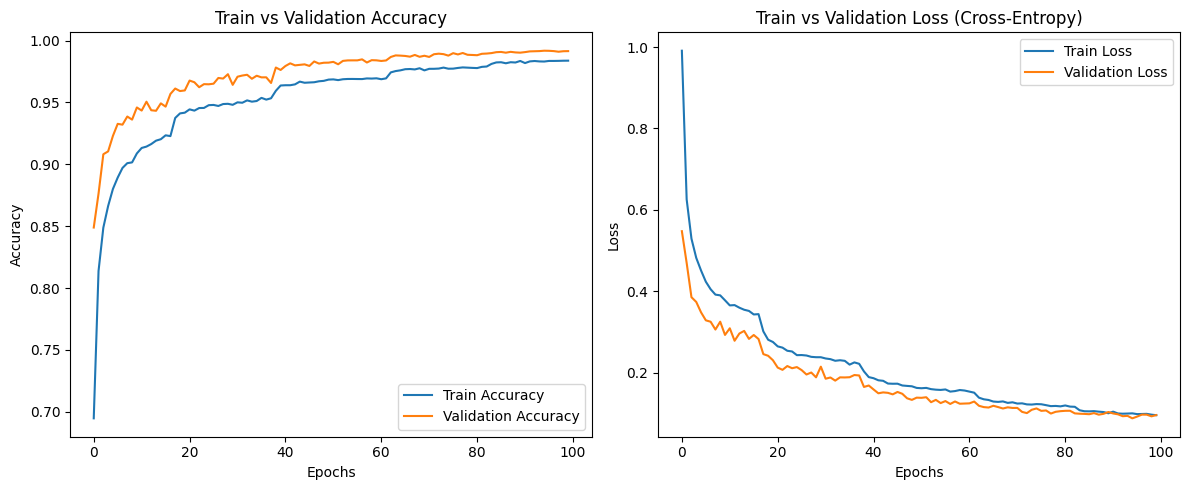

Test Accuracy: 0.9918
1608/1608 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step
Test Accuracy with Original Labels: 0.9918


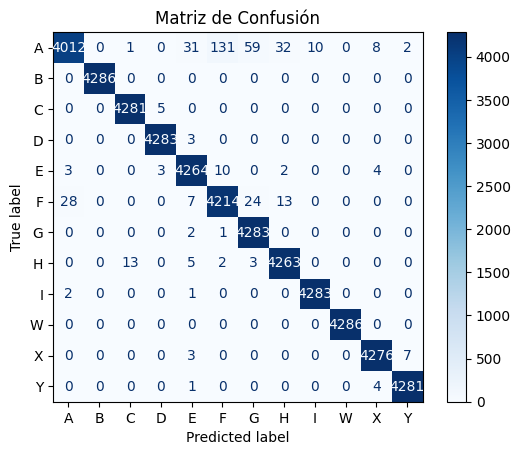

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Activation
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.regularizers import l2
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
import urllib.request
import zipfile

# Verificar si TensorFlow está usando la GPU
import tensorflow as tf
print("Dispositivos disponibles: ", tf.config.list_physical_devices('GPU'))

# Descargar y descomprimir los datos
url = 'https://archive.ics.uci.edu/static/public/459/avila.zip'
zip_filename = 'avila.zip'
urllib.request.urlretrieve(url, zip_filename)

with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall()

# Cargar los datasets de entrenamiento y prueba
columns = ['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'Class']
avila_train_data = pd.read_csv('avila/avila-tr.txt', names=columns)
avila_test_data = pd.read_csv('avila/avila-ts.txt', names=columns)

# Combinar los datos de entrenamiento y prueba para aplicar SMOTE
combined_data = pd.concat([avila_train_data, avila_test_data])
X = combined_data.iloc[:, :-1]
y = combined_data.iloc[:, -1]

# Mostrar la distribución original de las clases
print("Distribución original de las clases combinadas:", Counter(y))

# Aplicar SMOTE para balancear el dataset
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

# Verificar la nueva distribución de las clases después de SMOTE
print("Distribución de las clases después de SMOTE:", Counter(y_smote))

# Separar los datos en entrenamiento y prueba
trainX, testX, trainY, testY = train_test_split(X_smote, y_smote, test_size=0.5, stratify=y_smote, random_state=42)

# Codificar las etiquetas y One-Hot Encoding
label_encoder = LabelEncoder()
trainY_encoded = label_encoder.fit_transform(trainY)
trainY_categorical = to_categorical(trainY_encoded)

testY_encoded = label_encoder.transform(testY)
testY_categorical = to_categorical(testY_encoded)

# Estandarizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(trainX)
X_test = scaler.transform(testX)

# Definir el modelo
model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.0001)),
    BatchNormalization(),
    Dropout(0.2),

    Dense(512, activation='relu', kernel_regularizer=l2(0.0001)),
    BatchNormalization(),
    Dropout(0.2),

    Dense(256, activation='relu', kernel_regularizer=l2(0.0001)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(128, activation='relu', kernel_regularizer=l2(0.0001)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(trainY_categorical.shape[1], activation='softmax')
])

# Compilar el modelo
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks para detener entrenamiento temprano y reducir la tasa de aprendizaje
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)

# Entrenar el modelo
history = model.fit(X_train, trainY_categorical, epochs=100, batch_size=64,
                    validation_data=(X_test, testY_categorical),
                    callbacks=[early_stopping, reduce_lr], verbose=1)

# Graficar precisión y pérdida
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Train vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Train vs Validation Loss (Cross-Entropy)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluar el modelo en el conjunto de test
test_loss, test_accuracy = model.evaluate(X_test, testY_categorical, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Guardar el modelo entrenado
model.save('avila_model.h5')

# Predecir en los datos de prueba
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calcular precisión utilizando las etiquetas de prueba
precision = accuracy_score(testY_encoded, y_pred_classes)
print(f"Test Accuracy with Original Labels: {precision:.4f}")

# Crear la matriz de confusión
cm = confusion_matrix(testY_encoded, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.show()


Distribución original de las clases combinadas: Counter({'A': 8572, 'F': 3923, 'E': 2190, 'I': 1663, 'X': 1044, 'H': 1039, 'G': 893, 'D': 705, 'Y': 533, 'C': 206, 'W': 89, 'B': 10})
Distribución de las clases después de SMOTE: Counter({'A': 8572, 'F': 8572, 'H': 8572, 'E': 8572, 'I': 8572, 'Y': 8572, 'D': 8572, 'X': 8572, 'G': 8572, 'W': 8572, 'C': 8572, 'B': 8572})
Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


804/804 ━━━━━━━━━━━━━━━━━━━━ 26s 26ms/step - accuracy: 0.6070 - loss: 1.3060 - val_accuracy: 0.8428 - val_loss: 0.5507 - learning_rate: 0.0010
Epoch 2/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 39s 23ms/step - accuracy: 0.8016 - loss: 0.6626 - val_accuracy: 0.8747 - val_loss: 0.4748 - learning_rate: 0.0010
Epoch 3/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 0.8424 - loss: 0.5487 - val_accuracy: 0.9093 - val_loss: 0.3827 - learning_rate: 0.0010
Epoch 4/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 18s 22ms/step - accuracy: 0.8663 - loss: 0.4838 - val_accuracy: 0.9036 - val_loss: 0.3893 - learning_rate: 0.0010
Epoch 5/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - accuracy: 0.8791 - loss: 0.4527 - val_accuracy: 0.9306 - val_loss: 0.3347 - learning_rate: 0.0010
Epoch 6/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - accuracy: 0.8887 - loss: 0.4267 - val_accuracy: 0.9327 - val_loss: 0.3237 - learning_rate: 0.0010
Epoch 7/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - accuracy: 0.8922 - loss: 

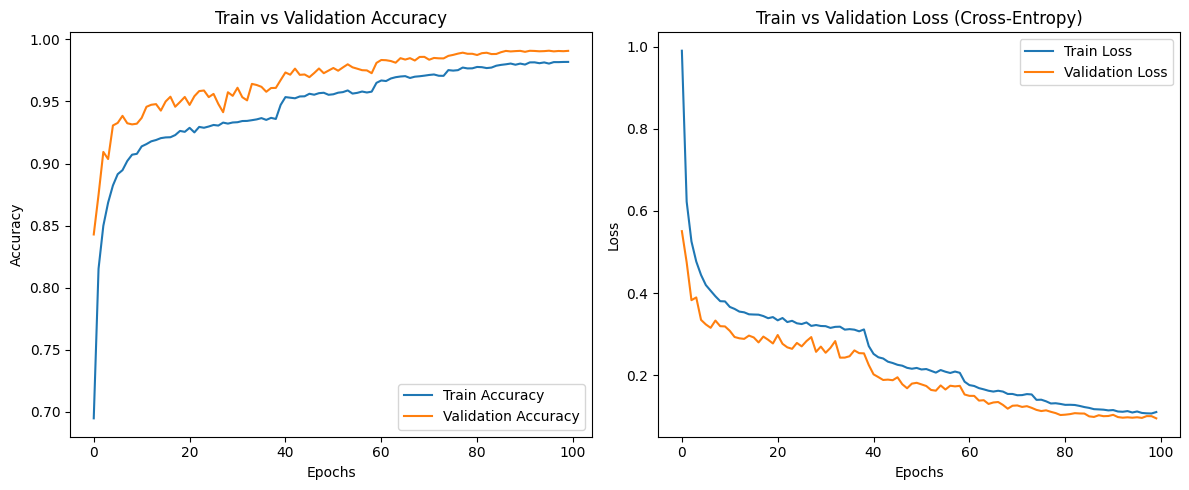

Test Accuracy: 0.9908
1608/1608 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step
Test Accuracy with Original Labels: 0.9908


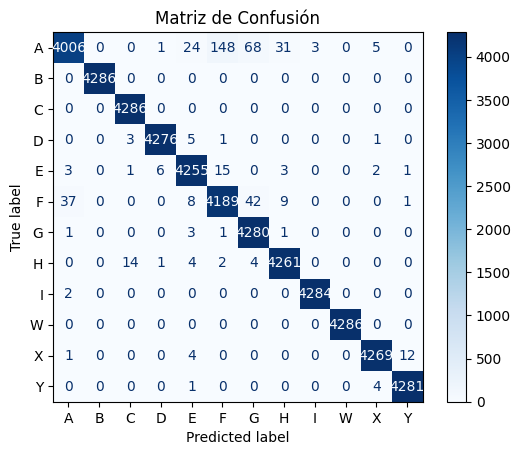

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Activation
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.regularizers import l2
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
import urllib.request
import zipfile


# Cargar los datasets de entrenamiento y prueba
columns = ['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'Class']
avila_train_data = pd.read_csv('avila-tr.txt', names=columns)
avila_test_data = pd.read_csv('avila-ts.txt', names=columns)

# Combinar los datos de entrenamiento y prueba para aplicar SMOTE
combined_data = pd.concat([avila_train_data, avila_test_data])
X = combined_data.iloc[:, :-1]
y = combined_data.iloc[:, -1]

# Mostrar la distribución original de las clases
print("Distribución original de las clases combinadas:", Counter(y))

# Aplicar SMOTE para balancear el dataset
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

# Verificar la nueva distribución de las clases después de SMOTE
print("Distribución de las clases después de SMOTE:", Counter(y_smote))

# Separar los datos en entrenamiento y prueba
trainX, testX, trainY, testY = train_test_split(X_smote, y_smote, test_size=0.5, stratify=y_smote, random_state=42)

# Codificar las etiquetas y One-Hot Encoding
label_encoder = LabelEncoder()
trainY_encoded = label_encoder.fit_transform(trainY)
trainY_categorical = to_categorical(trainY_encoded)

testY_encoded = label_encoder.transform(testY)
testY_categorical = to_categorical(testY_encoded)

# Estandarizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(trainX)
X_test = scaler.transform(testX)

# Definir el modelo
model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.0001)),
    BatchNormalization(),
    Dropout(0.2),

    Dense(512, activation='relu', kernel_regularizer=l2(0.0001)),
    BatchNormalization(),
    Dropout(0.2),

    Dense(256, activation='relu', kernel_regularizer=l2(0.0001)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(128, activation='relu', kernel_regularizer=l2(0.0001)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(trainY_categorical.shape[1], activation='softmax')
])

# Compilar el modelo
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks para detener entrenamiento temprano y reducir la tasa de aprendizaje
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)

# Entrenar el modelo
history = model.fit(X_train, trainY_categorical, epochs=100, batch_size=64,
                    validation_data=(X_test, testY_categorical),
                    callbacks=[early_stopping, reduce_lr], verbose=1)

# Graficar precisión y pérdida
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Train vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Train vs Validation Loss (Cross-Entropy)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluar el modelo en el conjunto de test
test_loss, test_accuracy = model.evaluate(X_test, testY_categorical, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Guardar el modelo entrenado
model.save('avila_model.h5')

# Predecir en los datos de prueba
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calcular precisión utilizando las etiquetas de prueba
precision = accuracy_score(testY_encoded, y_pred_classes)
print(f"Test Accuracy with Original Labels: {precision:.4f}")

# Crear la matriz de confusión
cm = confusion_matrix(testY_encoded, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 44s 38ms/step - accuracy: 0.4761 - loss: 1.6965 - val_accuracy: 0.6814 - val_loss: 1.0029 - learning_rate: 5.0000e-04
Epoch 2/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 18s 22ms/step - accuracy: 0.6743 - loss: 1.0240 - val_accuracy: 0.7603 - val_loss: 0.7954 - learning_rate: 5.0000e-04
Epoch 3/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 19s 21ms/step - accuracy: 0.7219 - loss: 0.8803 - val_accuracy: 0.8085 - val_loss: 0.6754 - learning_rate: 5.0000e-04
Epoch 4/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - accuracy: 0.7484 - loss: 0.8030 - val_accuracy: 0.7489 - val_loss: 0.8044 - learning_rate: 5.0000e-04
Epoch 5/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 18s 22ms/step - accuracy: 0.7633 - loss: 0.7586 - val_accuracy: 0.7975 - val_loss: 0.6488 - learning_rate: 5.0000e-04
Epoch 6/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 0.7726 - loss: 0.7216 - val_accuracy: 0.7719 - val_loss: 0.7306 - learning_rate: 5.0000e-04
Epoch 7/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 18s 2

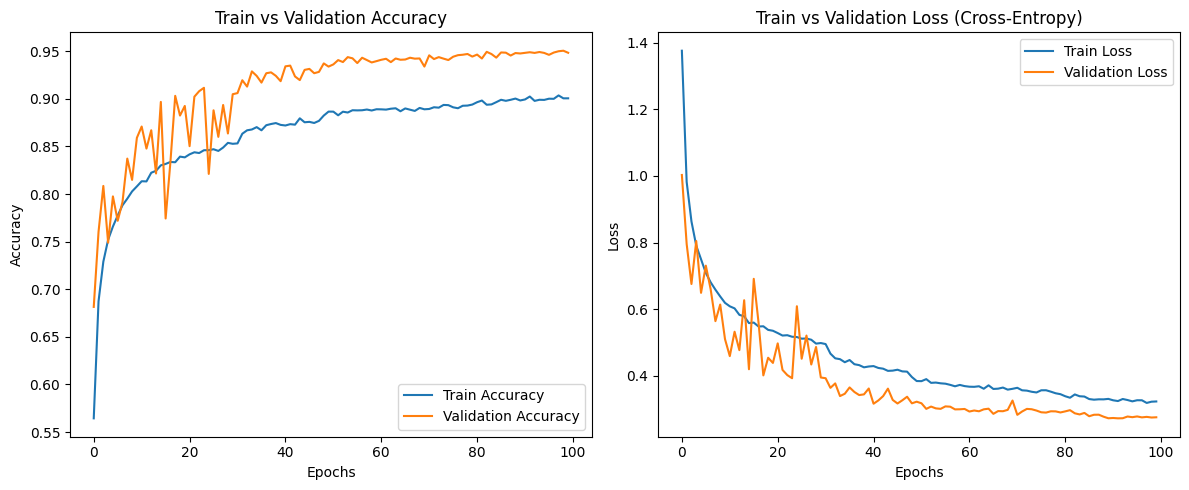

Test Accuracy: 0.9489
1608/1608 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step
Matriz de confusión:
[[3038    0   32   32  125  587  258  196   12    0    5    1]
 [   0 4286    0    0    0    0    0    0    0    0    0    0]
 [   0    0 4276    6    0    2    0    2    0    0    0    0]
 [   0    0   12 4250   12    9    0    0    0    0    3    0]
 [  17    0   10   44 4040   54   25   74    0    2   19    1]
 [ 423    0    0   11   46 3407  327   72    0    0    0    0]
 [   2    0    0    0    1   30 4251    2    0    0    0    0]
 [   5    0   21    0   12    2   25 4216    0    0    5    0]
 [   3    0    0    0    2    0    0    0 4281    0    0    0]
 [   0    0    0    0    0    0    0    0    0 4286    0    0]
 [   2    0    0    0    7    0    0    3    0    2 4210   62]
 [   0    0    1    1    2    0    0    0    0    0   20 4262]]
Reporte de clasificación:
              precision    recall  f1-score   support

           A       0.87      0.71      0.78      4286
           B       1.0

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.regularizers import l2
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter

# Cargar los datasets de entrenamiento y prueba
columns = ['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'Class']
avila_train_data = pd.read_csv('avila-tr.txt', names=columns)
avila_test_data = pd.read_csv('avila-ts.txt', names=columns)

# Combinar los datos de entrenamiento y prueba para aplicar SMOTE
combined_data = pd.concat([avila_train_data, avila_test_data])
X = combined_data.iloc[:, :-1]
y = combined_data.iloc[:, -1]

# Aplicar SMOTE para balancear el dataset
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

# Separar los datos en entrenamiento y prueba
trainX, testX, trainY, testY = train_test_split(X_smote, y_smote, test_size=0.5, stratify=y_smote, random_state=42)

# Codificar las etiquetas y One-Hot Encoding
label_encoder = LabelEncoder()
trainY_encoded = label_encoder.fit_transform(trainY)
trainY_categorical = to_categorical(trainY_encoded)

testY_encoded = label_encoder.transform(testY)
testY_categorical = to_categorical(testY_encoded)

# Estandarizar los datos
scaler = MinMaxScaler()
X_train = scaler.fit_transform(trainX)
X_test = scaler.transform(testX)

# Definir el modelo
model = Sequential([
    Dense(512, kernel_regularizer=l2(0.0001), input_shape=(X_train.shape[1],)),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    Dropout(0.4),

    Dense(512, kernel_regularizer=l2(0.0001)),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    Dropout(0.4),

    Dense(256, kernel_regularizer=l2(0.0001)),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    Dropout(0.3),

    Dense(128, kernel_regularizer=l2(0.0001)),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    Dropout(0.3),

    Dense(trainY_categorical.shape[1], activation='softmax')
])

# Compilar el modelo
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks para detener entrenamiento temprano y reducir la tasa de aprendizaje
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=7, min_lr=0.00001)

# Entrenar el modelo
history = model.fit(X_train, trainY_categorical, epochs=100, batch_size=64,
                    validation_data=(X_test, testY_categorical),
                    callbacks=[early_stopping, reduce_lr], verbose=1)

# Graficar precisión y pérdida
def plot_history(history):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Train vs Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Train vs Validation Loss (Cross-Entropy)')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_history(history)

# Evaluar el modelo en el conjunto de test
test_loss, test_accuracy = model.evaluate(X_test, testY_categorical, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Guardar el modelo entrenado
model.save('avila_model.h5')

# Predecir en los datos de prueba
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Reportar resultados
print("Matriz de confusión:")
print(confusion_matrix(testY_encoded, y_pred_classes))
print("Reporte de clasificación:")
print(classification_report(testY_encoded, y_pred_classes, target_names=label_encoder.classes_))
